## Explainability Map Maker

1. Recall test results from data/*.pkl
2. Make stats (find best mae indices)
3. Draw

In [1]:
import os
from pathlib import Path
import pickle
import numpy as np
from functools import partial

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme();

from sage.visualization.vistool import plot_vismap
from utils.analysis import (
    Result, FileSelector,
    group_stats, cherry_picker, check_existence, save2nifti
)

In [2]:
AVG = np.load("./data/average.npy")

with open("./data/naive_reg_test_100.pkl", "rb") as f:
    naive_results = pickle.load(f)
    naive_results = {e[0]: e[1] for e in sorted(naive_results.items(), key=lambda x: x[0])}
    
with open("./data/augment_reg_test_100.pkl", "rb") as f:
    augment_results = pickle.load(f)
    augment_results = {e[0]: e[1] for e in sorted(augment_results.items(), key=lambda x: x[0])}

In [3]:
with open("./data/naive_nonreg_test_100.pkl", "rb") as f:
    naive_nonreg_results = pickle.load(f)
    naive_nonreg_results = {e[0]: e[1] for e in sorted(naive_nonreg_results.items(), key=lambda x: x[0])}
    
with open("./data/augment_nonreg_test_100.pkl", "rb") as f:
    augment_nonreg_results = pickle.load(f)
    augment_nonreg_results = {e[0]: e[1] for e in sorted(augment_nonreg_results.items(), key=lambda x: x[0])}

In [4]:
naive = Result(naive_results)
augment = Result(augment_results)

naive_nonreg = Result(naive_nonreg_results)
augment_nonreg = Result(augment_nonreg_results)

In [5]:
last_values_naive = [e[-1][1] for e in naive.raw_data.values()]
last_values_augment = [e[-1][1] for e in augment.raw_data.values()]

best_values_naive = [min(_[1] for _ in e) for e in naive.raw_data.values()]
best_values_augment = [min(_[1] for _ in e) for e in augment.raw_data.values()]

earlystopped_values_naive = [e[-20][1] for e in naive.raw_data.values()]
earlystopped_values_augment = [e[-20][1] for e in augment.raw_data.values()]

total_train_naive = [len(e) for e in naive.raw_data.values()]
total_train_augment = [len(e) for e in augment.raw_data.values()]

best_indices_naive = [sorted(e, key=lambda x: x[1])[0][0] for e in naive.raw_data.values()]
best_indices_augment = [sorted(e, key=lambda x: x[1])[0][0] for e in augment.raw_data.values()]

In [6]:
print(f"{'*' * 10} REGISTRATION RESULT {'*' * 10}")
group_stats(last_values_naive, last_values_augment, "Last Value")
group_stats(best_values_naive, best_values_augment, "Best Value")
group_stats(earlystopped_values_naive, earlystopped_values_augment, "Early Stopped Value")
group_stats(total_train_naive, total_train_augment, "Total Training Epoch Value")
group_stats(best_indices_naive, best_indices_augment, "Best Indices Value")

********** REGISTRATION RESULT **********
Last Value
Naive  : 6.459 ± 0.460
Augment: 5.960 ± 0.374
Statistics: 8.38 p-value: 9.650525648904605e-15

Best Value
Naive  : 5.946 ± 0.350
Augment: 5.657 ± 0.336
Statistics: 5.92 p-value: 1.367862133621852e-08

Early Stopped Value
Naive  : 6.531 ± 0.533
Augment: 6.108 ± 0.474
Statistics: 5.91 p-value: 1.5110333992096324e-08

Total Training Epoch Value
Naive  : 55.510 ± 19.332
Augment: 68.550 ± 21.861
Statistics: -4.45 p-value: 1.4558776504063892e-05

Best Indices Value
Naive  : 42.340 ± 15.907
Augment: 58.000 ± 18.856
Statistics: -6.32 p-value: 1.7334374807259104e-09



In [7]:
for k in augment_nonreg.raw_data.keys():
    if augment_nonreg[k] == []:
        print(k)

In [8]:
# del augment_nonreg.raw_data["20220125-0935_resnet"]

In [9]:
last_values_naive_nonreg = [e[-1][1] for e in naive_nonreg.raw_data.values()]
last_values_augment_nonreg = [e[-1][1] for e in augment_nonreg.raw_data.values()]

best_values_naive_nonreg = [min(_[1] for _ in e) for e in naive_nonreg.raw_data.values()]
best_values_augment_nonreg = [min(_[1] for _ in e) for e in augment_nonreg.raw_data.values()]

earlystopped_values_naive_nonreg = [e[-20][1] for e in naive_nonreg.raw_data.values()]
earlystopped_values_augment_nonreg = [e[-20][1] for e in augment_nonreg.raw_data.values()]

total_train_naive_nonreg = [len(e) for e in naive_nonreg.raw_data.values()]
total_train_augment_nonreg = [len(e) for e in augment_nonreg.raw_data.values()]

best_indices_naive_nonreg = [sorted(e, key=lambda x: x[1])[0][0] for e in naive_nonreg.raw_data.values()]
best_indices_augment_nonreg = [sorted(e, key=lambda x: x[1])[0][0] for e in augment_nonreg.raw_data.values()]

In [10]:
print(f"{'*' * 10} NON-REGISTRATION RESULT {'*' * 10}")
group_stats(last_values_naive_nonreg, last_values_augment_nonreg, "Last Value")
group_stats(best_values_naive_nonreg, best_values_augment_nonreg, "Best Value")
group_stats(earlystopped_values_naive_nonreg, earlystopped_values_augment_nonreg, "Early Stopped Value")
group_stats(total_train_naive_nonreg, total_train_augment_nonreg, "Total Training Epoch Value")
group_stats(best_indices_naive_nonreg, best_indices_augment_nonreg, "Best Indices Value")

********** NON-REGISTRATION RESULT **********
Last Value
Naive  : 7.754 ± 0.487
Augment: 6.752 ± 0.804
Statistics: 10.62 p-value: 3.985883780738282e-21

Best Value
Naive  : 7.256 ± 0.304
Augment: 6.435 ± 0.675
Statistics: 11.04 p-value: 2.187084298105172e-22

Early Stopped Value
Naive  : 7.860 ± 0.472
Augment: 7.047 ± 0.744
Statistics: 9.18 p-value: 5.761159785315653e-17

Total Training Epoch Value
Naive  : 54.390 ± 17.338
Augment: 64.640 ± 25.021
Statistics: -3.35 p-value: 0.0009668285601141367

Best Indices Value
Naive  : 41.530 ± 17.407
Augment: 53.350 ± 22.229
Statistics: -4.17 p-value: 4.635446435487839e-05



### Make maps based on their best MAE

In [11]:
best_indices = {
    "naive": best_indices_naive,
    "augment": best_indices_augment,
    "naive_nonreg": best_indices_naive_nonreg,
    "augment_nonreg": best_indices_augment_nonreg,
}

def make_best_maps(config):


    """
    config <str>:
        use one of naive, naive_nonreg, augment, augment_nonreg
    """
    selector = FileSelector(config)
    _cherry_picker = partial(cherry_picker, selector=selector)
    _check_existence = partial(check_existence, selector=selector)

    filtered = list(filter(
        _check_existence,
        zip(range(len(best_indices[config])), best_indices[config])
    ))
    best_map = np.array(list(map(
        _cherry_picker,
        filtered
    )))
    return best_map
    

### Pick top 1% value from each checkpoints

In [56]:
def make_soft_thresholded_map(best_map, quantile, masked=False):

    thresholded = np.array([
        (np.abs(npy) > np.quantile(np.abs(npy), quantile)) for npy in best_map
    ]) * best_map
    plot_vismap(AVG, np.mean(thresholded, axis=0), masked=masked);
    return thresholded

In [71]:
quantile = 0.95
top = round(100 * (1 - quantile))

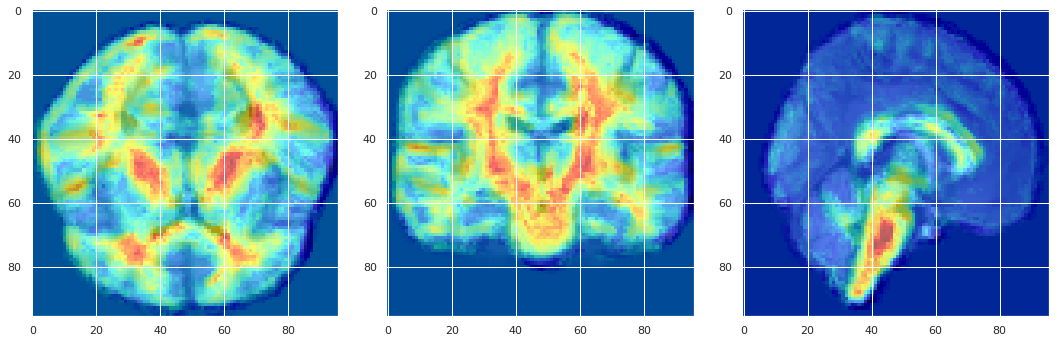

In [72]:
best_maps_naive = make_best_maps("naive")
best_maps_naive_threshold = \
    make_soft_thresholded_map(best_maps_naive, quantile)

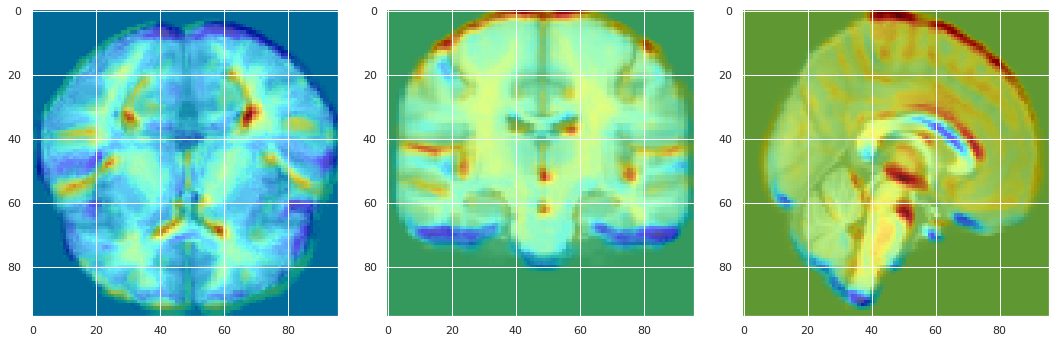

In [73]:
best_maps_augment = make_best_maps("augment")
best_maps_augment_threshold = \
    make_soft_thresholded_map(best_maps_augment, quantile)

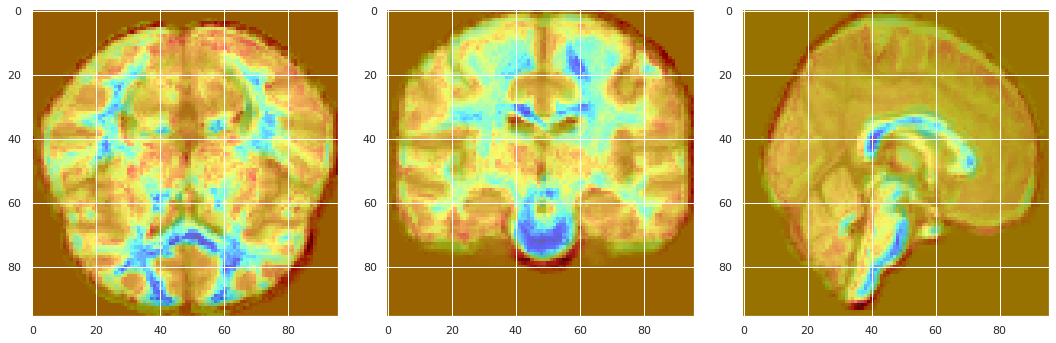

In [74]:
best_maps_naive_nonreg = make_best_maps("naive_nonreg")
best_maps_naive_nonreg_threshold = \
    make_soft_thresholded_map(best_maps_naive_nonreg, quantile)

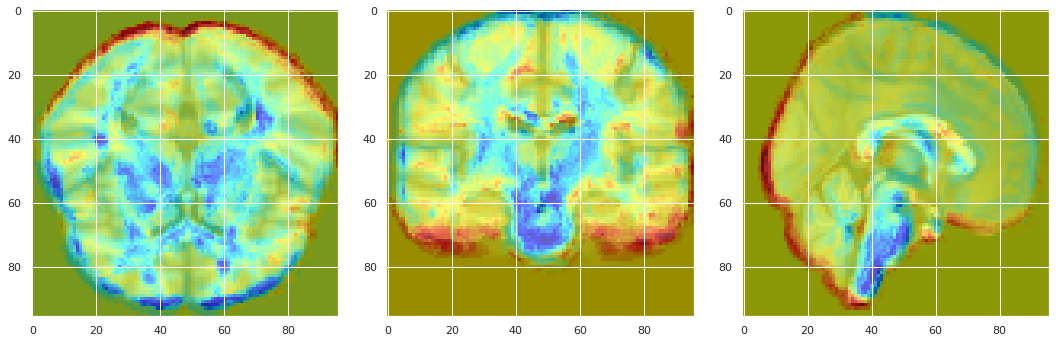

In [75]:
best_maps_augment_nonreg = make_best_maps("augment_nonreg")
best_maps_augment_nonreg_threshold = \
    make_soft_thresholded_map(best_maps_augment_nonreg, quantile)

In [62]:
# np.save(f"../new_result/naive_raw_top{top}.npy", best_maps_naive_threshold)
# np.save(f"../new_result/aug_raw_top{top}.npy", best_maps_augment_threshold)

# np.save(f"../new_result/naive_nonreg_raw_top{top}.npy", best_maps_naive_nonreg_threshold)
# np.save(f"../new_result/aug_nonreg_raw_top{top}.npy", best_maps_augment_nonreg_threshold)

In [63]:
# save2nifti(best_maps_naive_threshold, "../new_result/naive_raw_top10.nii")
# save2nifti(best_maps_augment_threshold, "../new_result/aug_raw_top10.nii")

save2nifti(best_maps_naive_nonreg_threshold, f"../new_result/naive_nonreg_raw_top{top}.nii")
save2nifti(best_maps_augment_nonreg_threshold, f"../new_result/aug_nonreg_raw_top{top}.nii")

### Top n% with m-agreements between seeds

In [64]:
quantile = .90
top = int(1-quantile)

agree_threshold = 45

In [65]:
def count_nonzero_voxels(thrsh):
    return (thrsh != 0).sum()
    
def exp_quantile_agree(maps_agg, quantile, agree_threshold, plot=True):

    print(f"Quantile: {quantile:.2f} | Agree Threhsold: {agree_threshold}")

    bool_brain = np.array([
        (np.abs(npy) > np.quantile(np.abs(npy), quantile)) for npy in maps_agg
    ])
    agreement = bool_brain.sum(axis=0) > agree_threshold
    thresholded = (maps_agg * agreement).sum(axis=0)
    print(f"Nonzero Voxels: {count_nonzero_voxels(thresholded)}")
    if plot:
        plot_vismap(AVG, thresholded, masked=False);
    return thresholded

Naive
Quantile: 0.90 | Agree Threhsold: 45
Nonzero Voxels: 6893


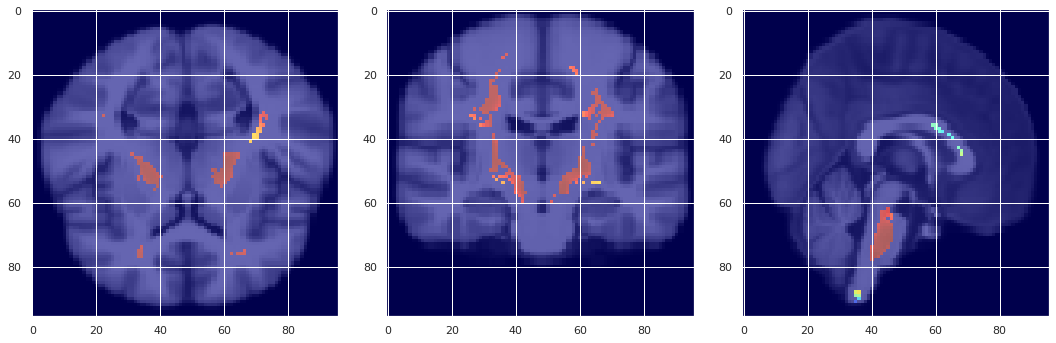

Augment
Quantile: 0.90 | Agree Threhsold: 45
Nonzero Voxels: 7532


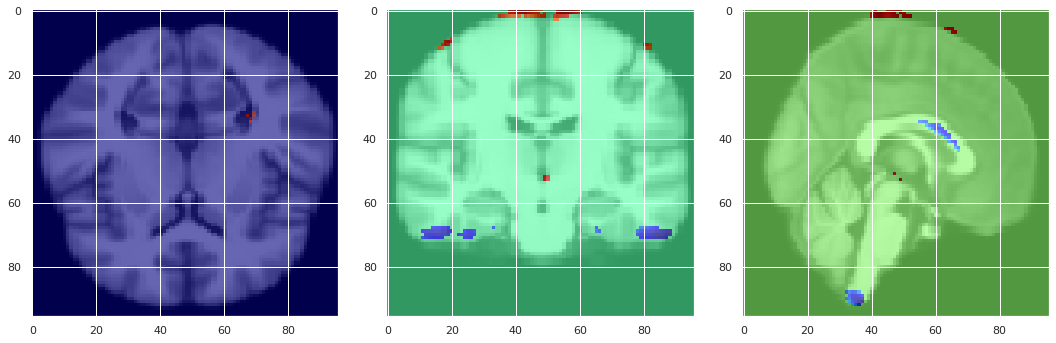

In [66]:
print("Naive")
naive_tmp = exp_quantile_agree(best_maps_naive, quantile, agree_threshold);
print("Augment")
aug_tmp = exp_quantile_agree(best_maps_augment, quantile, agree_threshold);

Nonzero Voxels: 126


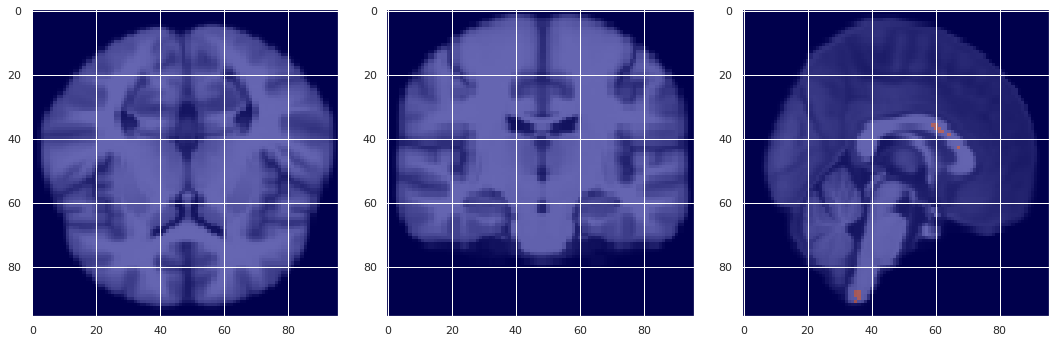

In [67]:
intersection = ((naive_tmp != 0) & (aug_tmp != 0)).astype(np.float32)
print(f"Nonzero Voxels: {count_nonzero_voxels(intersection)}")
plot_vismap(AVG, intersection, masked=True);

In [68]:
# top = round((1 - quantile)*100)
# config = f"top{top}_agree{agree_threshold}"
# dir_name = f"../miccai2022/{config}_best"
# print(dir_name)
# os.mkdir(dir_name)
# save2nifti(naive_tmp, Path(dir_name, f"{config}_naive.nii"))
# save2nifti(aug_tmp, Path(dir_name, f"{config}_augment.nii"))
# save2nifti(intersection, Path(dir_name, f"{config}_intersect.nii"))

Naive Non-registered
Quantile: 0.90 | Agree Threhsold: 45
Nonzero Voxels: 14928


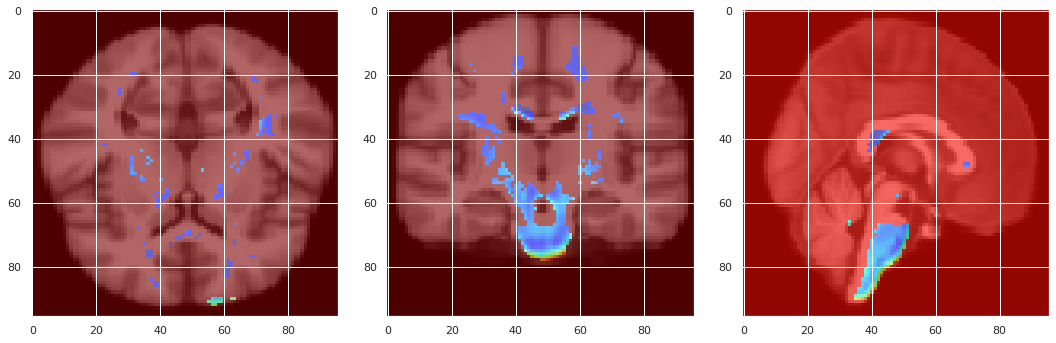

Augment Non-registered
Quantile: 0.90 | Agree Threhsold: 45
Nonzero Voxels: 13625


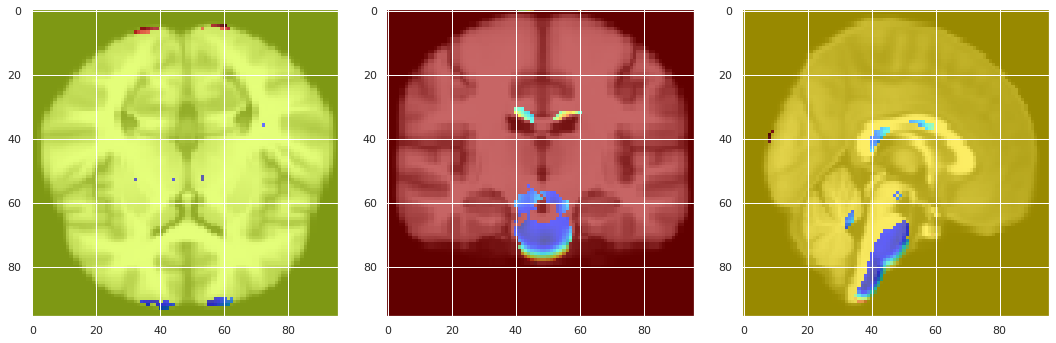

In [69]:
print("Naive Non-registered")
naive_nonreg_tmp = exp_quantile_agree(best_maps_naive_nonreg, quantile, agree_threshold);
print("Augment Non-registered")
aug_nonreg_tmp = exp_quantile_agree(best_maps_augment_nonreg, quantile, agree_threshold);

Nonzero Voxels: 5811


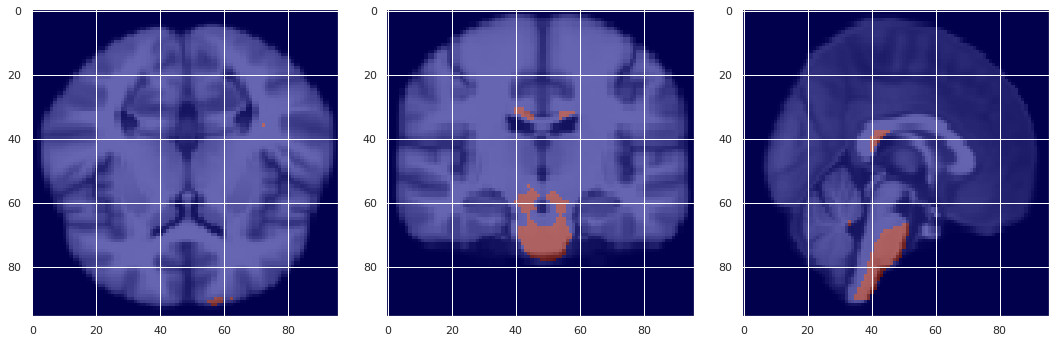

In [70]:
intersection_nonreg = ((naive_nonreg_tmp != 0) & (aug_nonreg_tmp != 0)).astype(np.float32)
print(f"Nonzero Voxels: {count_nonzero_voxels(intersection_nonreg)}")
plot_vismap(AVG, intersection_nonreg, masked=True);

## Misc

1. Plot non-zero values historgram
2. Plot non-zero values among agreement threshold

In [77]:
non_zero = lambda x: list(filter(lambda a: a != 0, x.flatten()))

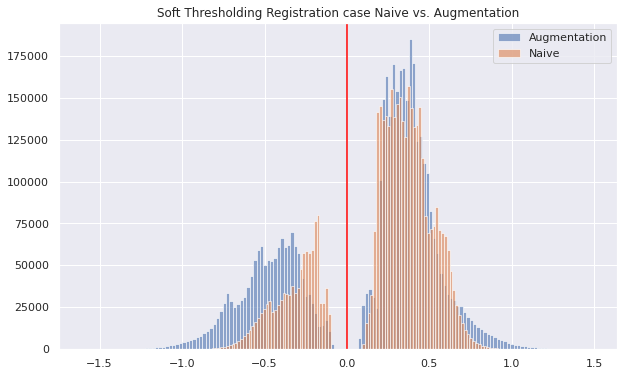

In [78]:
plt.figure(figsize=(10, 6));
plt.title("Soft Thresholding Registration case Naive vs. Augmentation")
plt.hist(non_zero(best_maps_augment_threshold), bins=150, label="Augmentation", alpha=.6);
plt.hist(non_zero(best_maps_naive_threshold), bins=150, label="Naive", alpha=.6);

plt.axvline(0, color="red");
plt.legend();

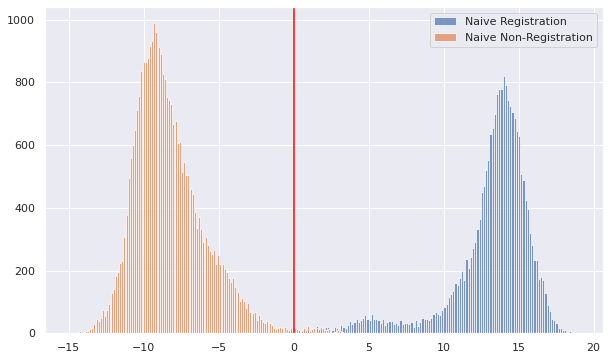

In [69]:
plt.figure(figsize=(10, 6));
plt.hist(non_zero(naive_tmp), bins=150, label="Naive Registration", alpha=.7);
plt.hist(non_zero(naive_nonreg_tmp), bins=150, label="Naive Non-Registration", alpha=.7);
plt.axvline(0, color="red");
plt.legend();

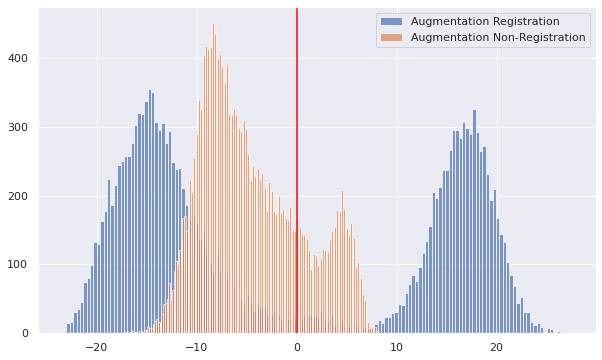

In [63]:
plt.figure(figsize=(10, 6));
plt.hist(non_zero(aug_tmp), bins=150, label="Augmentation Registration", alpha=.7);
plt.hist(non_zero(aug_nonreg_tmp), bins=150, label="Augmentation Non-Registration", alpha=.7);
plt.axvline(0, color="red");
plt.legend();

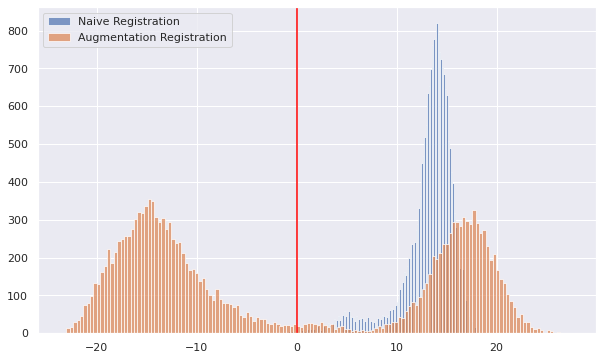

In [73]:
plt.figure(figsize=(10, 6));
plt.hist(non_zero(naive_tmp), bins=150, label="Naive Registration", alpha=.7);
plt.hist(non_zero(aug_tmp), bins=150, label="Augmentation Registration", alpha=.7);
plt.axvline(0, color="red");
plt.legend();

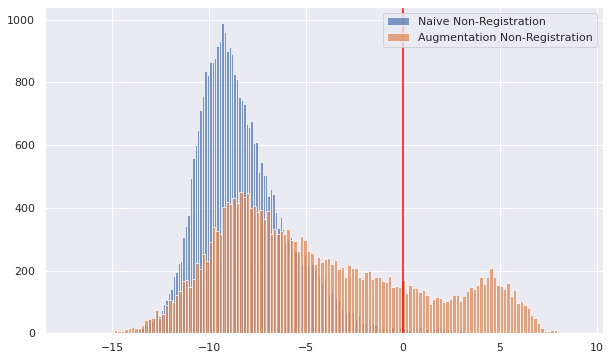

In [70]:
plt.figure(figsize=(10, 6));
plt.hist(non_zero(naive_nonreg_tmp), bins=150, label="Naive Non-Registration", alpha=.7);
plt.hist(non_zero(aug_nonreg_tmp), bins=150, label="Augmentation Non-Registration", alpha=.7);
plt.axvline(0, color="red");
plt.legend();

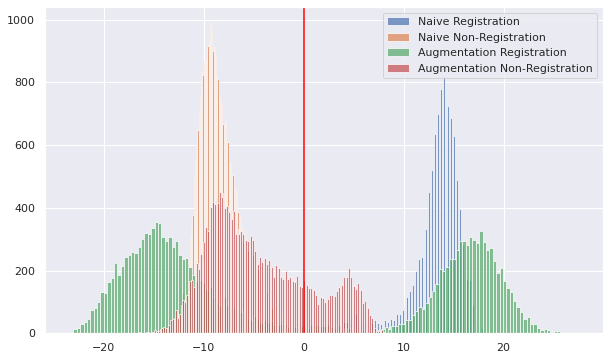

In [71]:
plt.figure(figsize=(10, 6));

plt.hist(non_zero(naive_tmp), bins=150, label="Naive Registration", alpha=.7);
plt.hist(non_zero(naive_nonreg_tmp), bins=150, label="Naive Non-Registration", alpha=.7);

plt.hist(non_zero(aug_tmp), bins=150, label="Augmentation Registration", alpha=.7);
plt.hist(non_zero(aug_nonreg_tmp), bins=150, label="Augmentation Non-Registration", alpha=.7);

plt.axvline(0, color="red");

plt.legend();

In [ ]:
naive_nonzero = []
aug_nonzero = []
intersection_nonzero = []

for _agree_threshold in range(100):
    
    naive_tmp = exp_quantile_agree(best_maps_naive, quantile, _agree_threshold, plot=False)
    aug_tmp = exp_quantile_agree(best_maps_augment, quantile, _agree_threshold, plot=False)
    naive_nonzero.append(count_nonzero_voxels(naive_tmp))
    aug_nonzero.append(count_nonzero_voxels(aug_tmp))

    intersection = ((naive_tmp != 0) & (aug_tmp != 0)).astype(np.float32)
    intersection_nonzero.append(count_nonzero_voxels(intersection))

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_title(f"Non zero Voxels for top{round(100 * (1-quantile))}%", size="x-large")
ax.plot(naive_nonzero, label="Naive")
ax.plot(aug_nonzero, label="Augmentation")
ax.plot(intersection_nonzero, label="Intersection")
# ax.set_xlim(30, 60)
# ax.set_ylim(0, 1000)
ax.legend()

## Augmentation Ablation

In [123]:
from glob import glob
import yaml
from sage.config import load_config

In [124]:
aug_results = sorted(glob("../augment_ablation/*"))

In [ ]:
from utils.analysis import FileSelector, Result, MAE

naive_sel = FileSelector("naive")
gt_result = np.array(naive_sel.test_gt)
epoch_parser = lambda path: int(path.split("/layer0/ep")[-1].split("_mae")[0])

In [153]:
aug_min = {}
for idx, _result in enumerate(aug_results):

    with open(_result + "/test.yml", "r") as f:
        test_prediction = yaml.load(f, Loader=yaml.Loader)

    min_mae = 100
    for epoch, _prediction in test_prediction.items():
        
        mae = MAE(gt_result, _prediction)
        if mae < min_mae:
            min_mae = mae
            min_epoch = epoch
    
    aug_min[idx] = {
        "aug_proba": load_config(_result + "/config.yml").aug_proba,
        "min_mae": min_mae,
        "min_epoch": min_epoch
    }

    npy_list = sorted(glob(_result + "/npy_std/layer0/*.npy"))
    selected_npy = list(filter(lambda x: epoch_parser(x) == min_epoch, npy_list))
    assert len(selected_npy) == 1

    selected_npy = selected_npy[0]
    aug_min[idx].update({
        "npy": np.load(selected_npy),
        "npy_path": selected_npy
    })

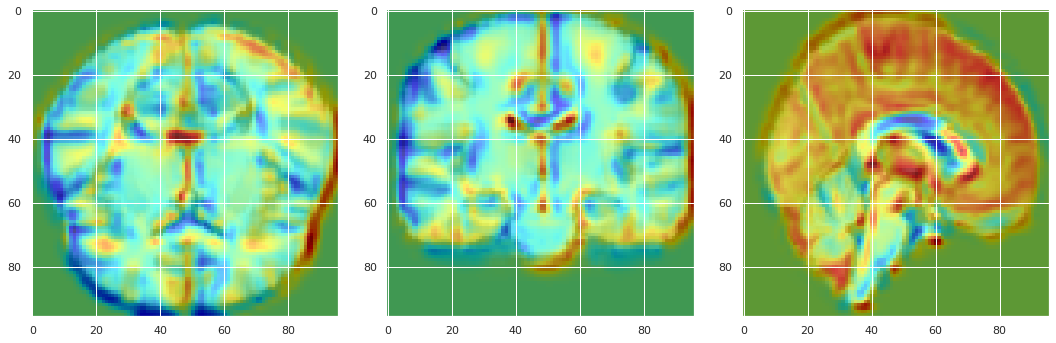

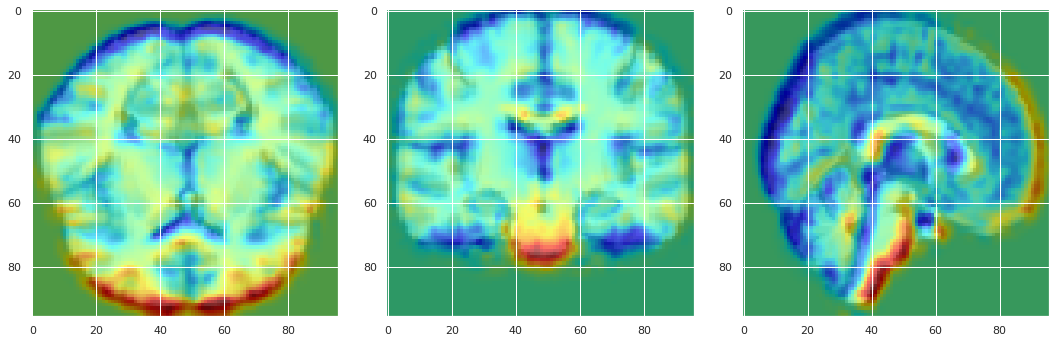

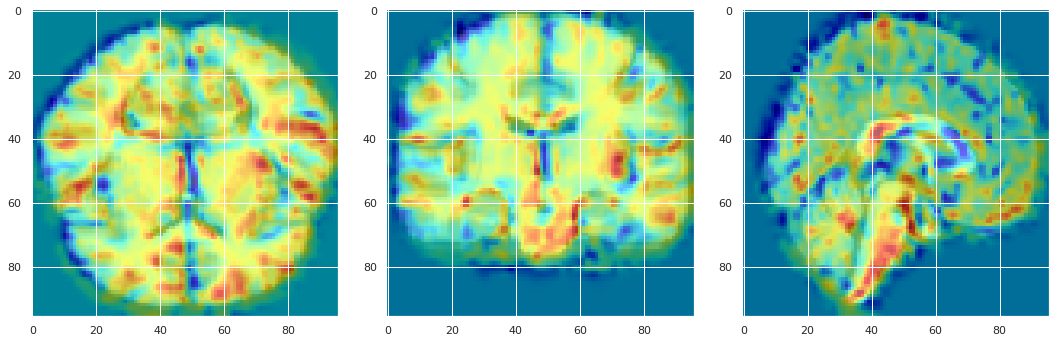

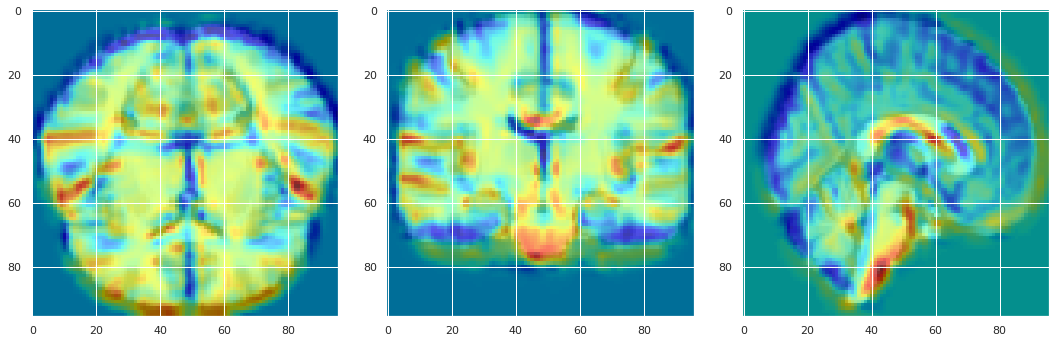

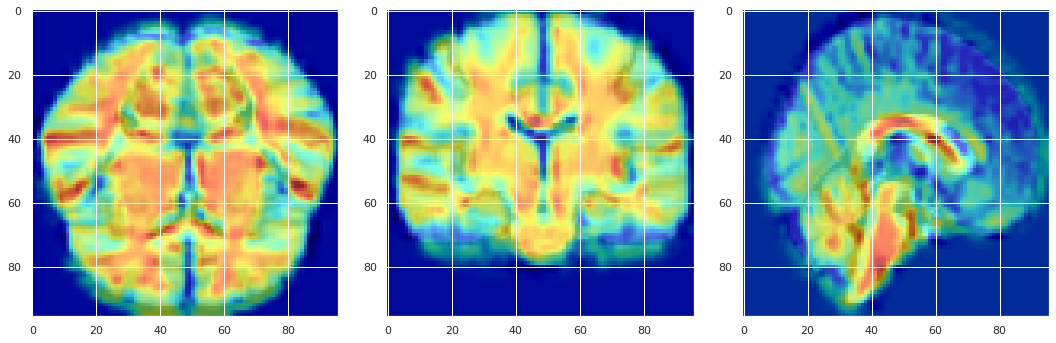

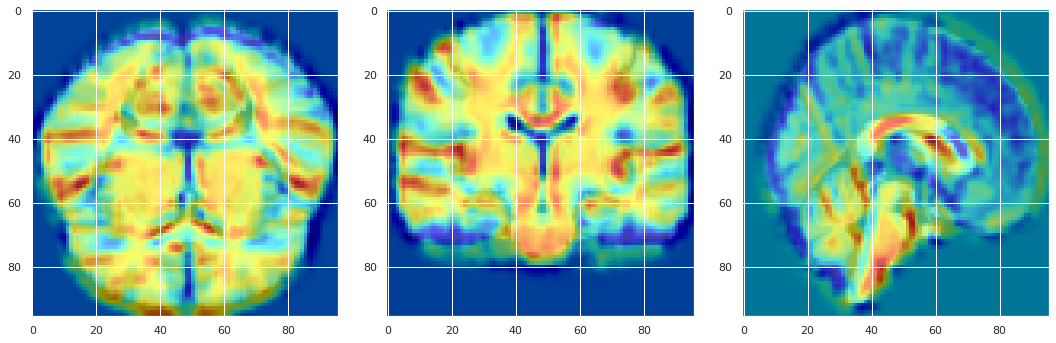

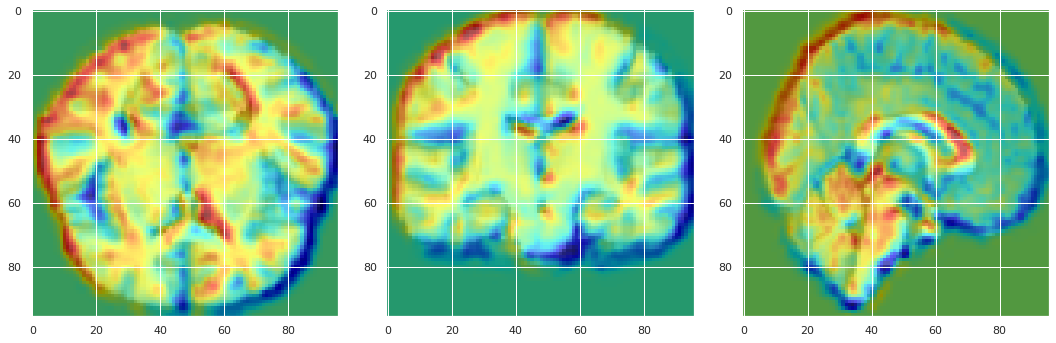

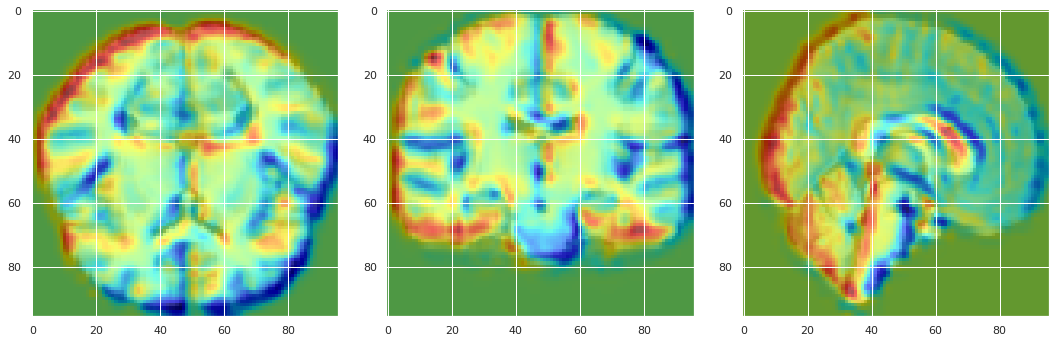

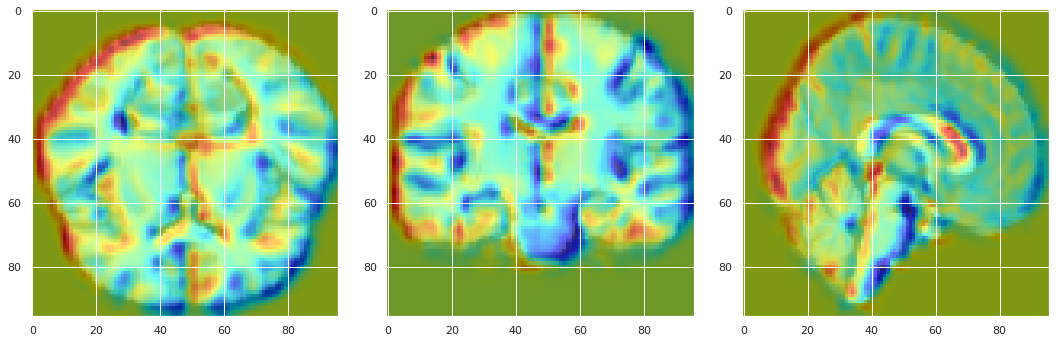

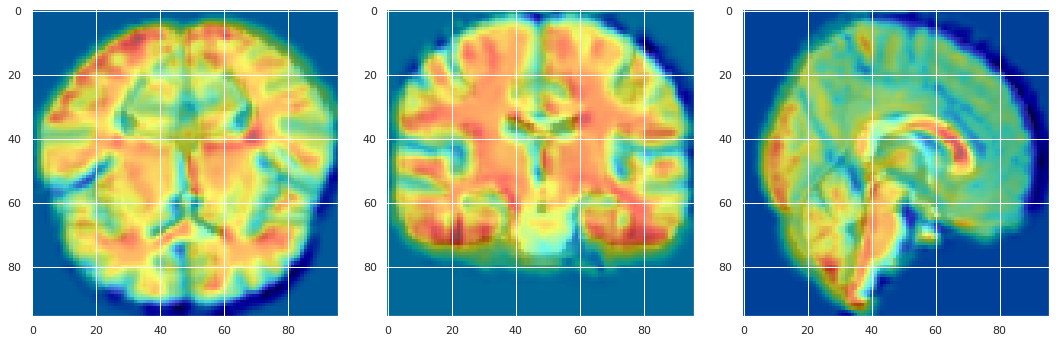

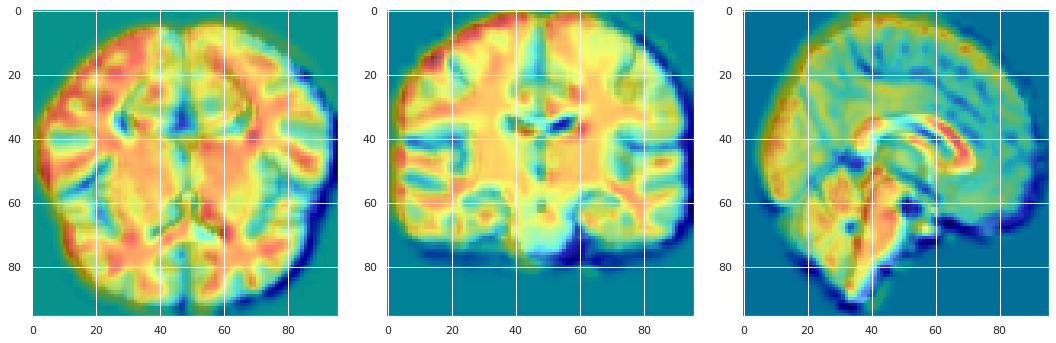

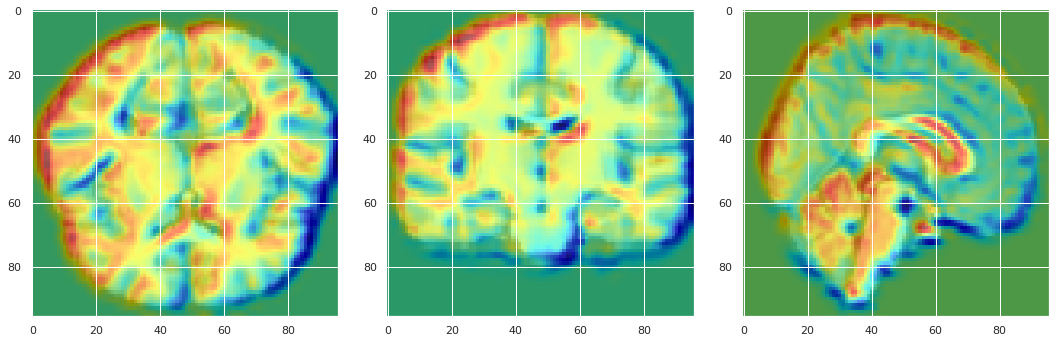

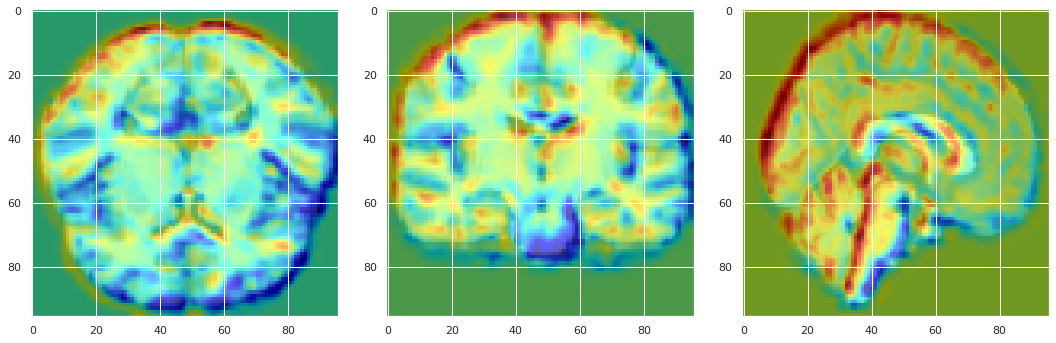

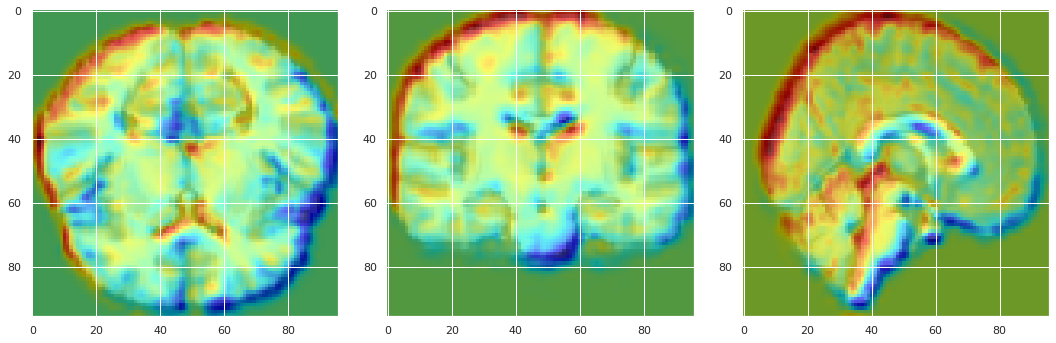

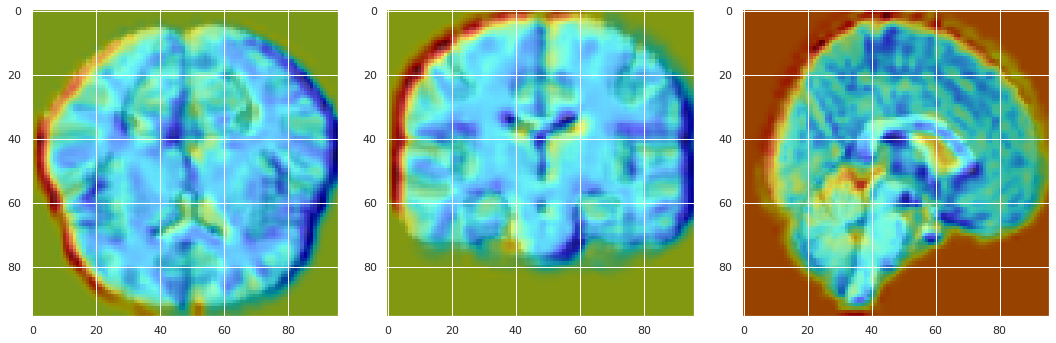

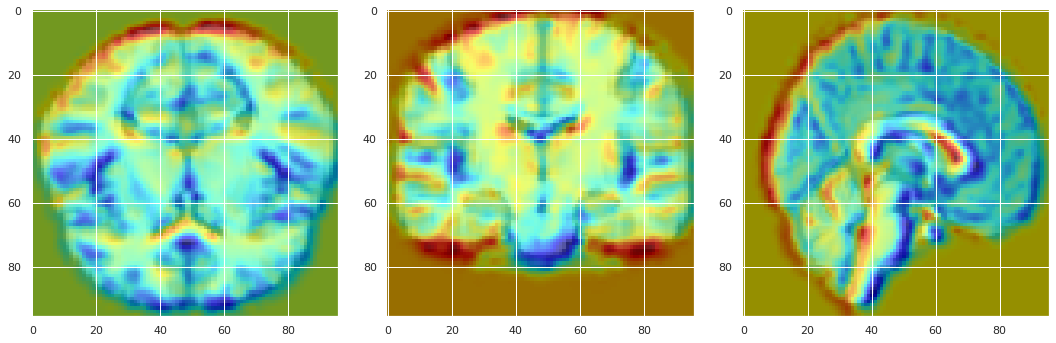

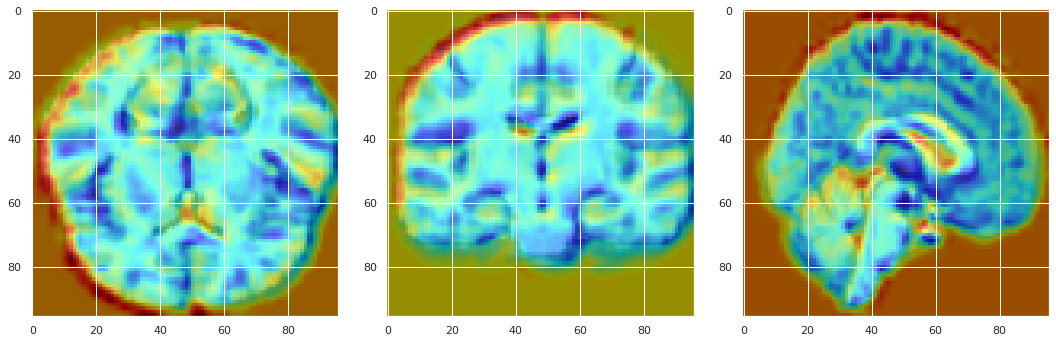

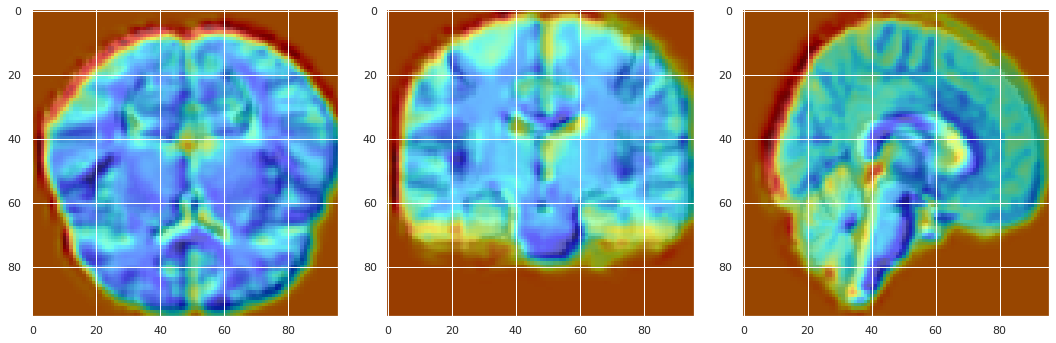

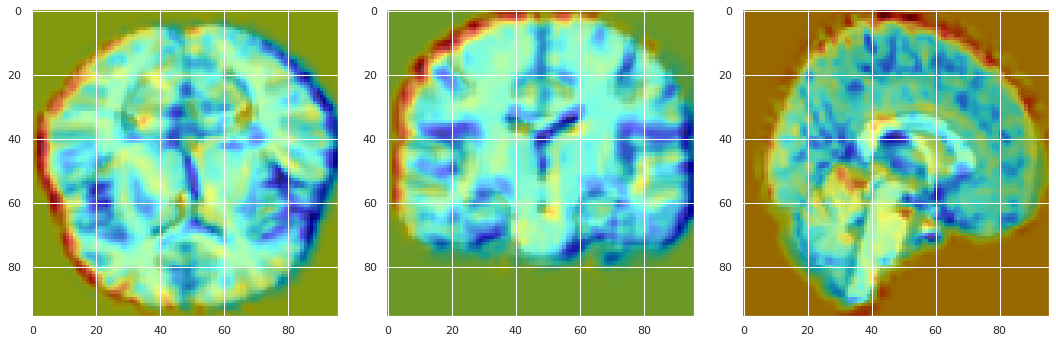

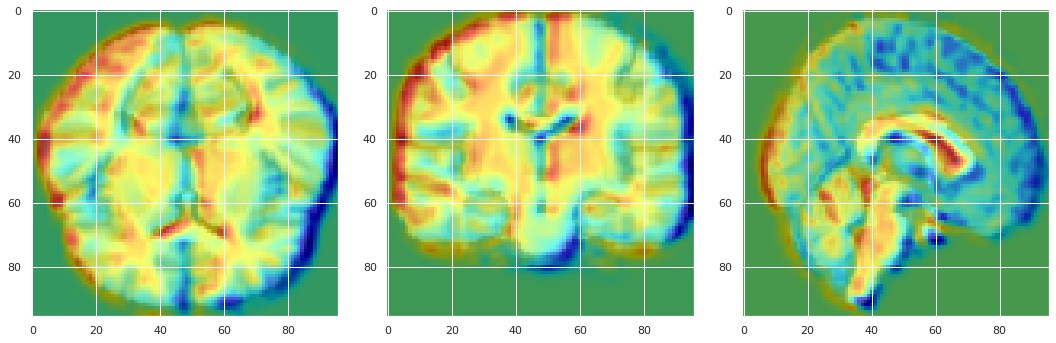

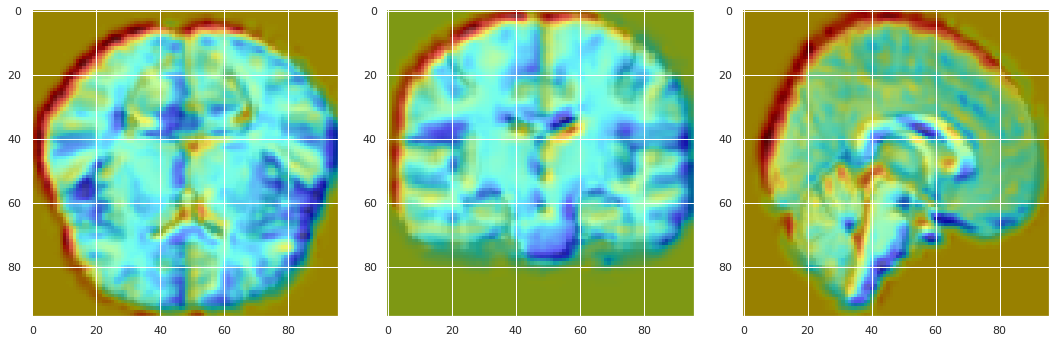

In [162]:
npy_list = sorted(glob(_result + "/npy_std/layer0/*.npy"))
for _npy_path in npy_list:

    plot_vismap(AVG, np.load(_npy_path), masked=False);

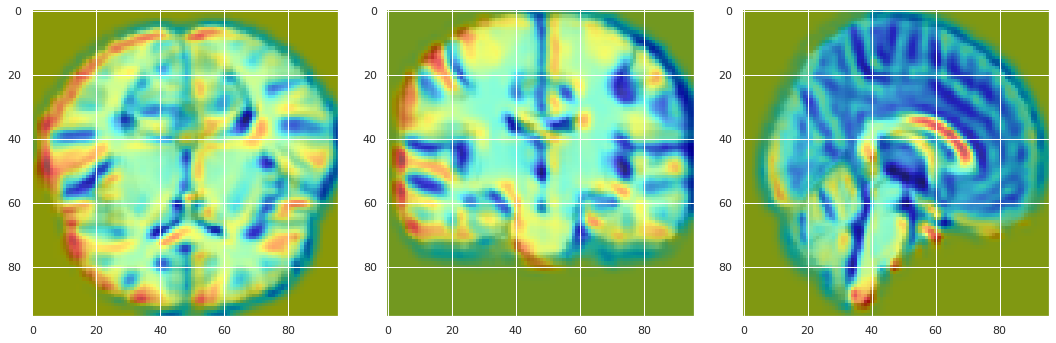

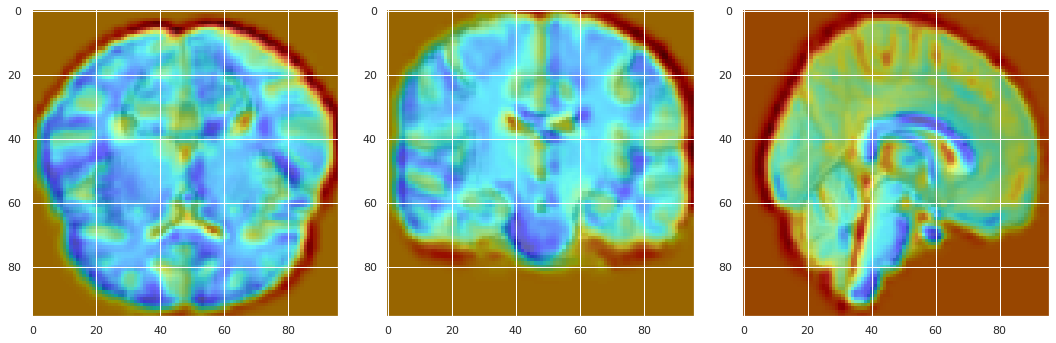

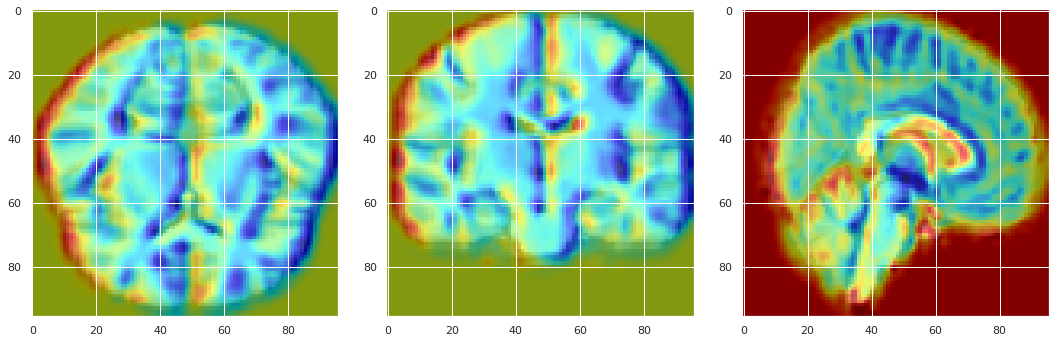

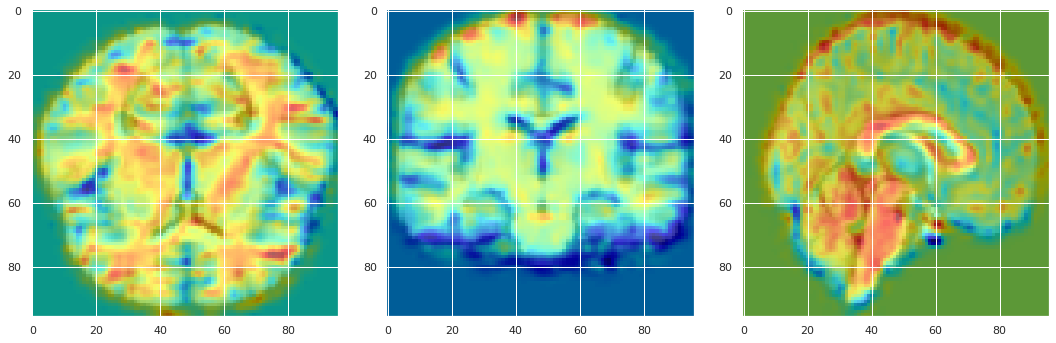

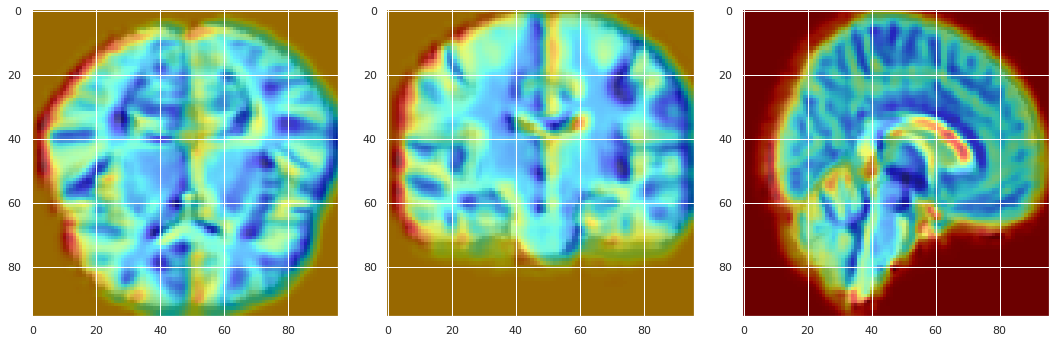

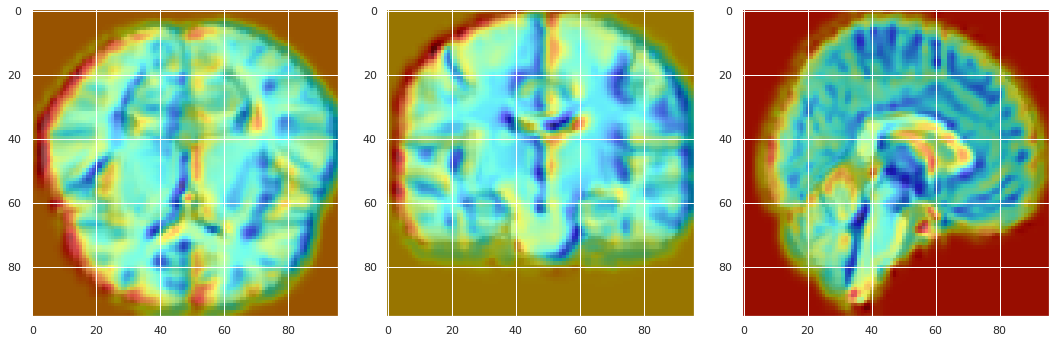

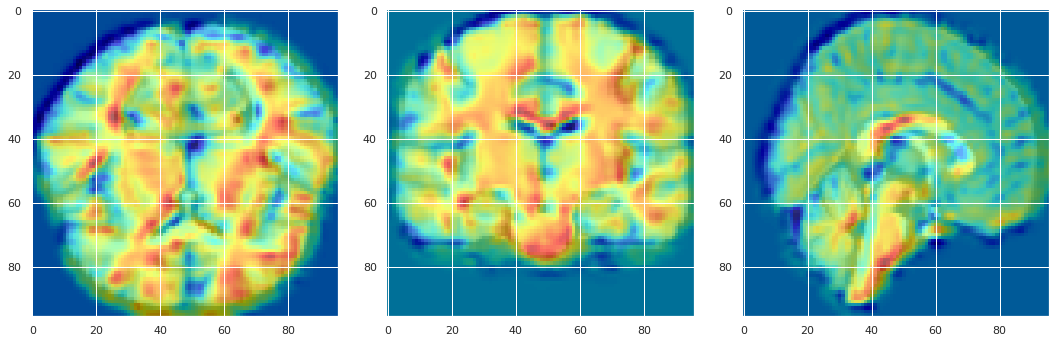

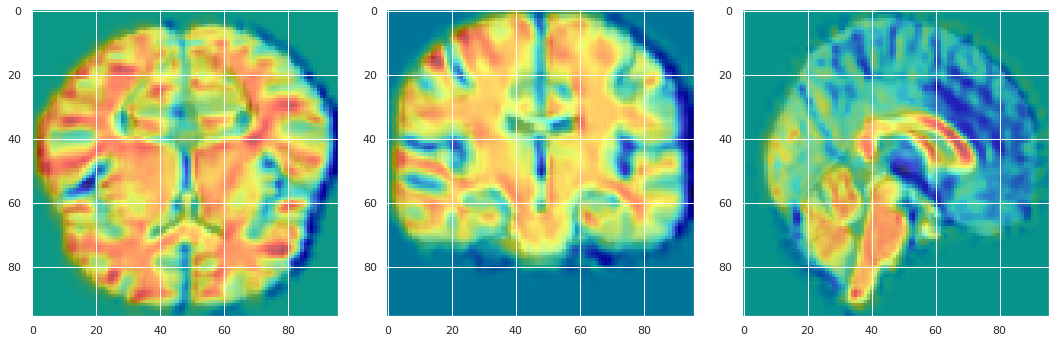

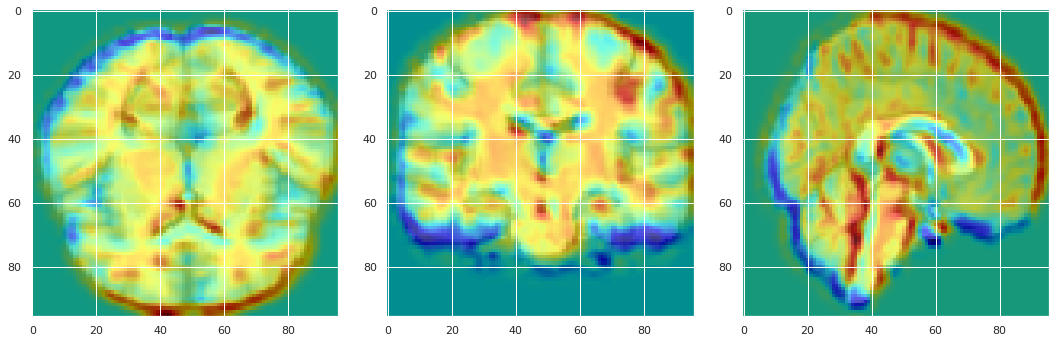

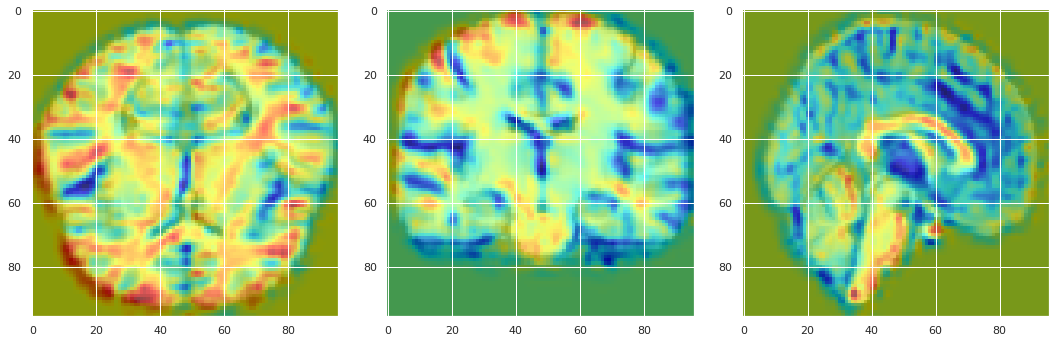

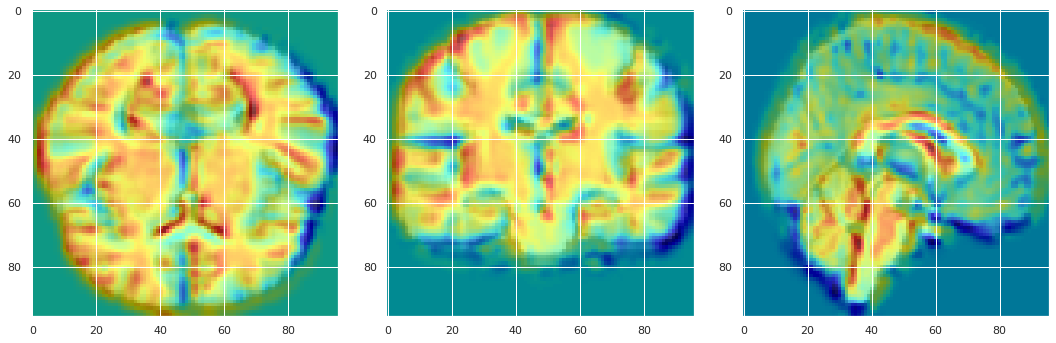

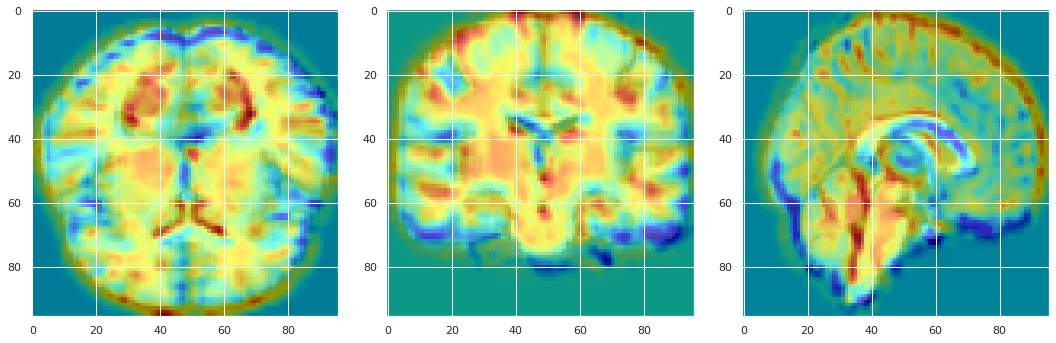

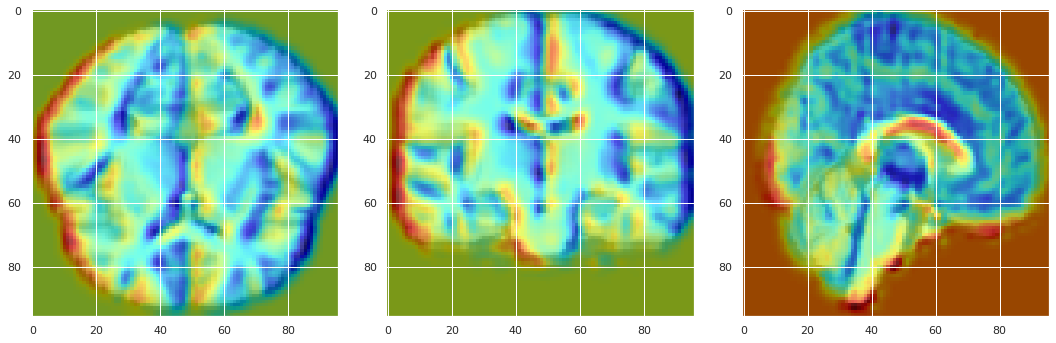

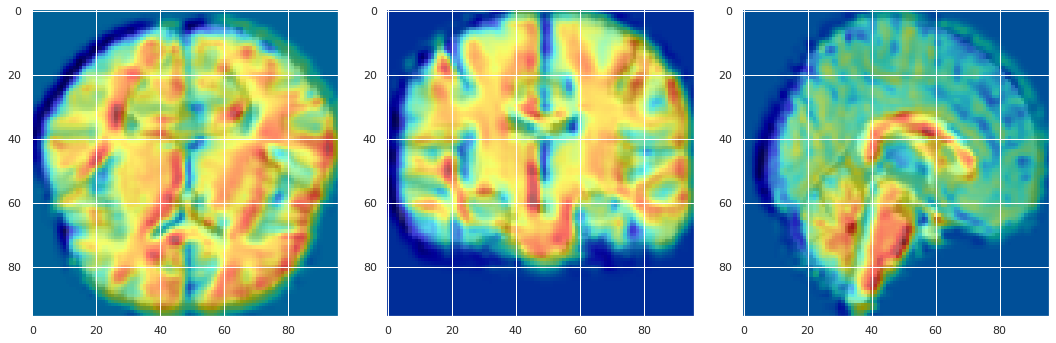

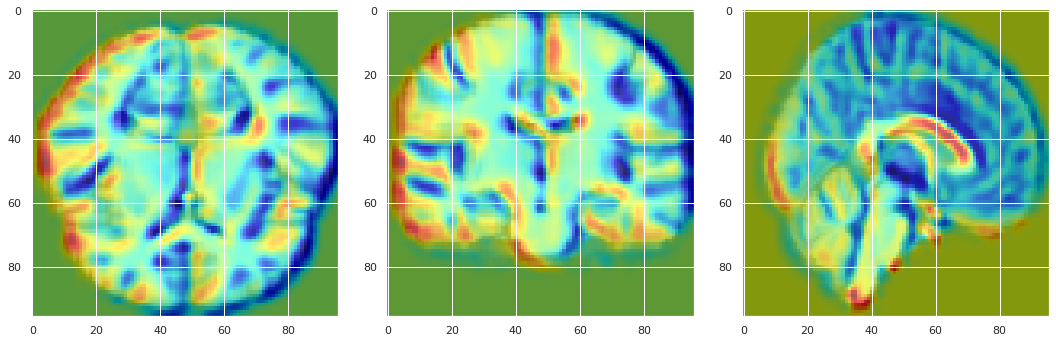

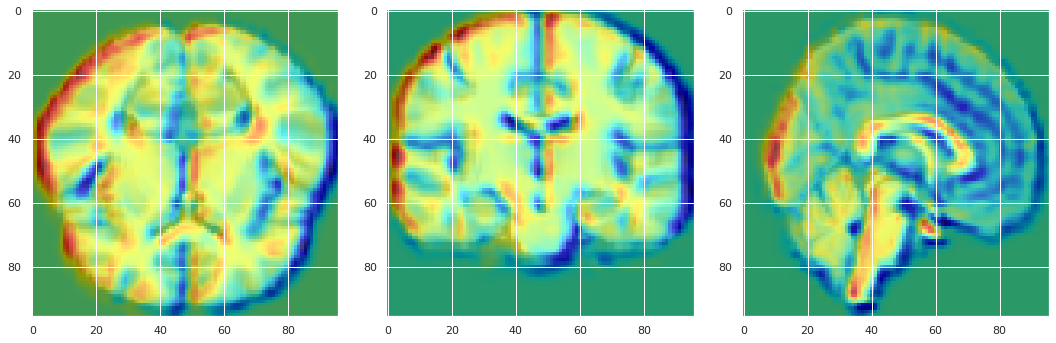

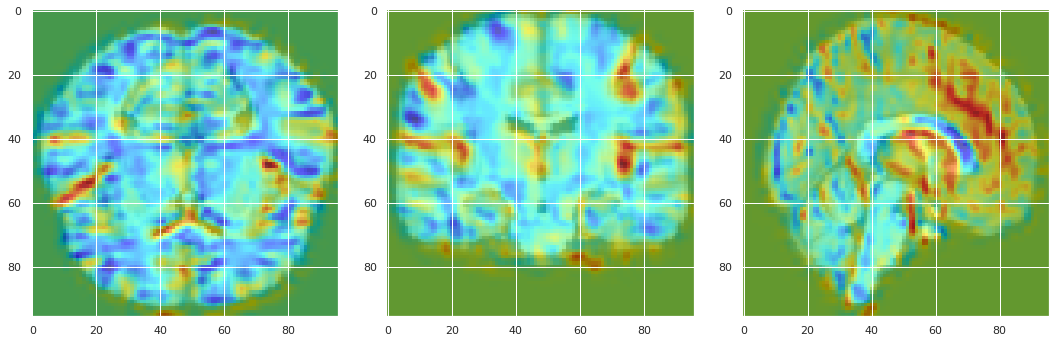

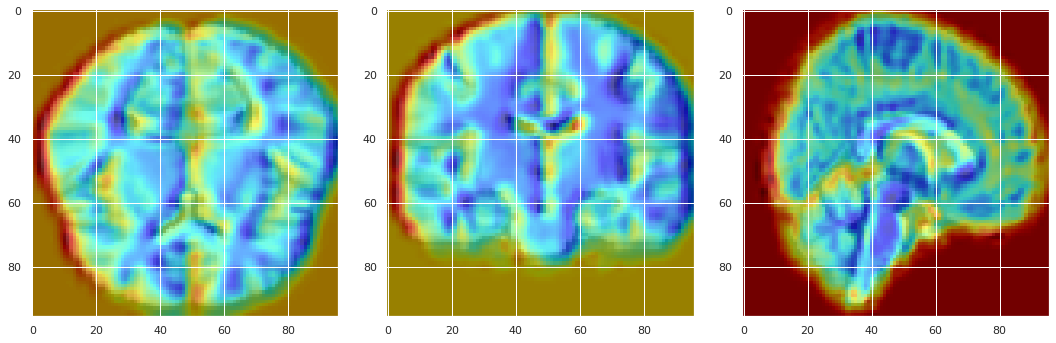

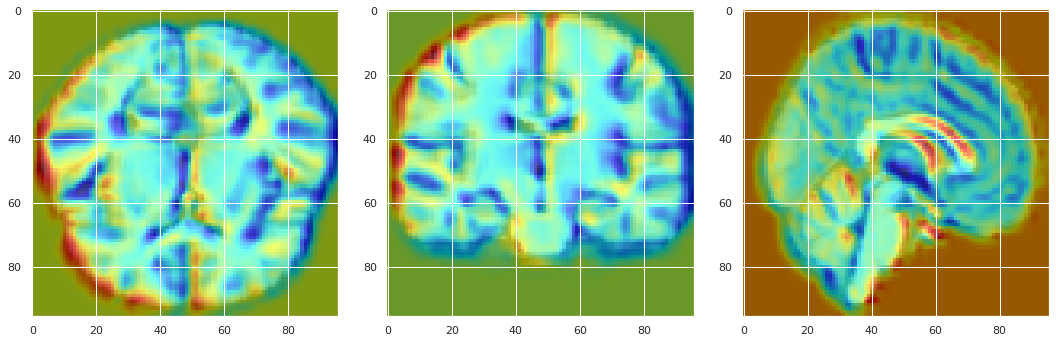

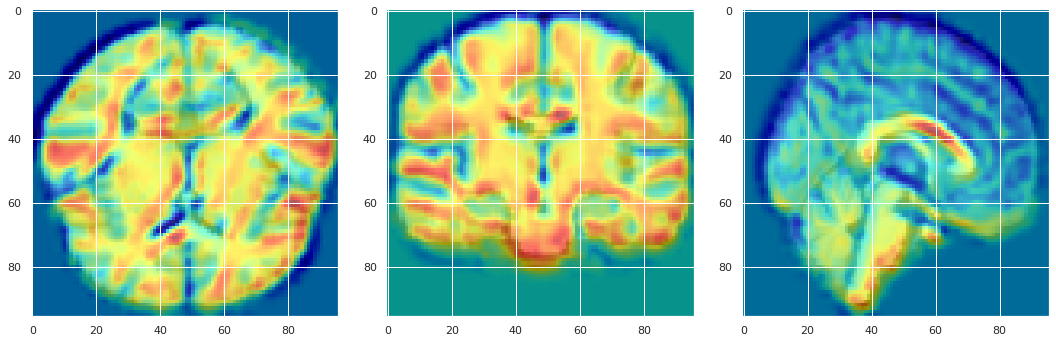

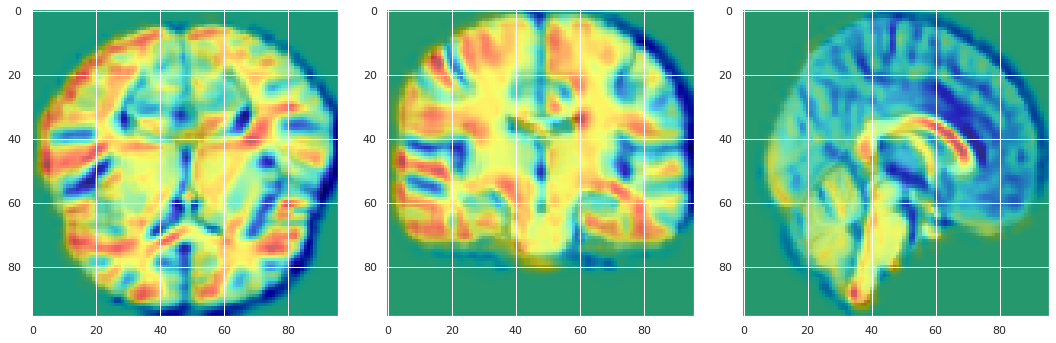

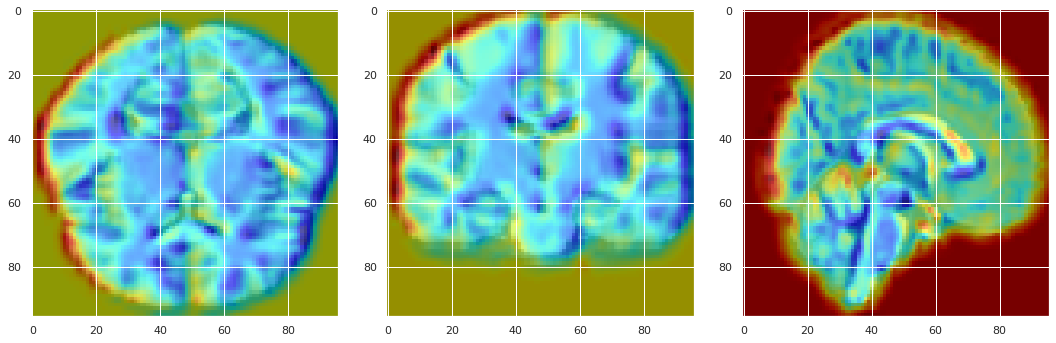

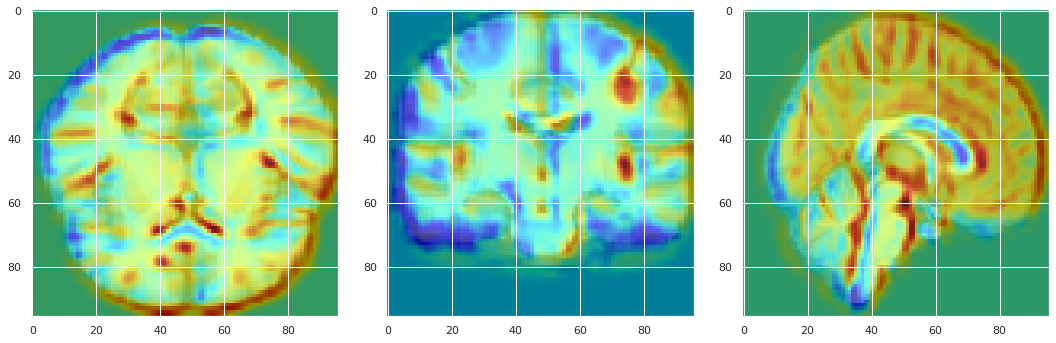

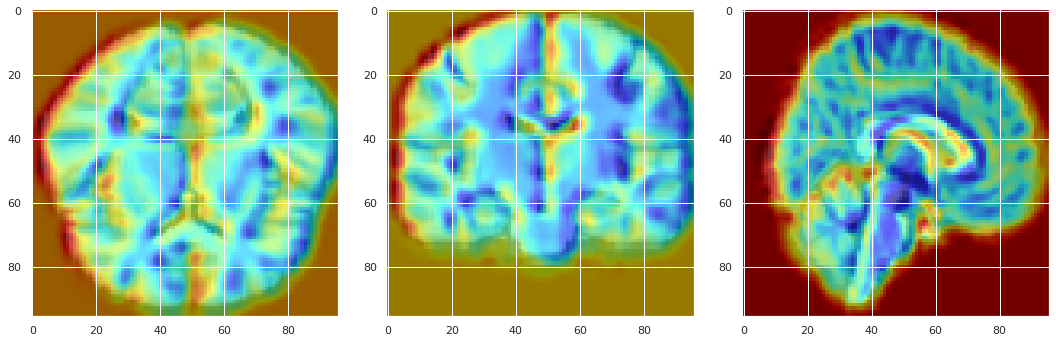

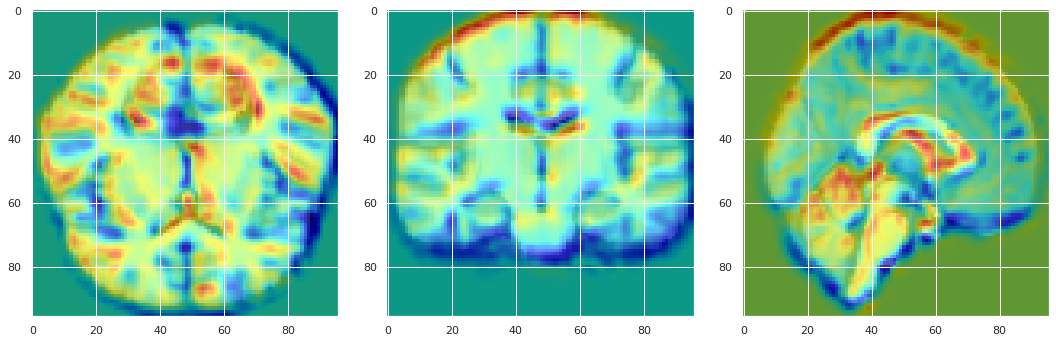

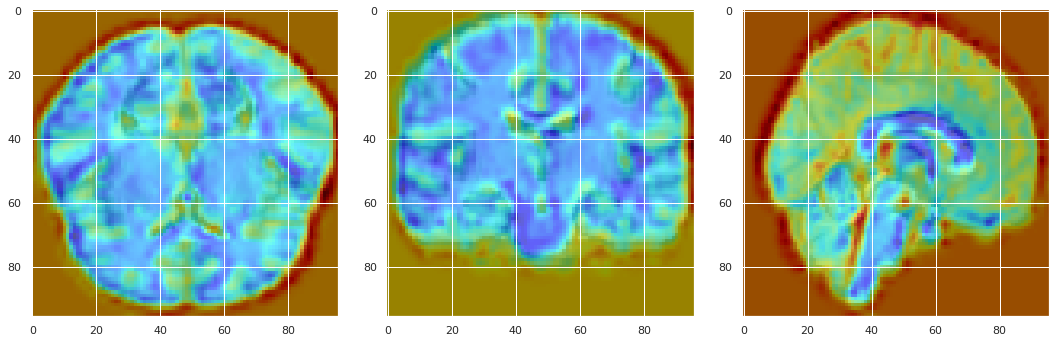

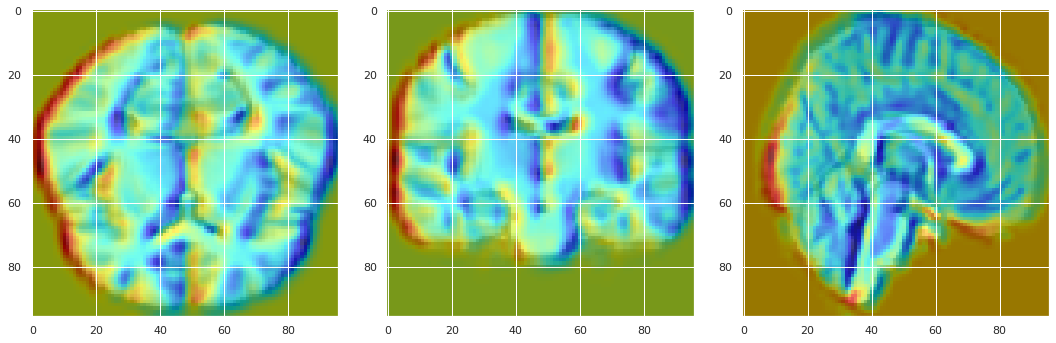

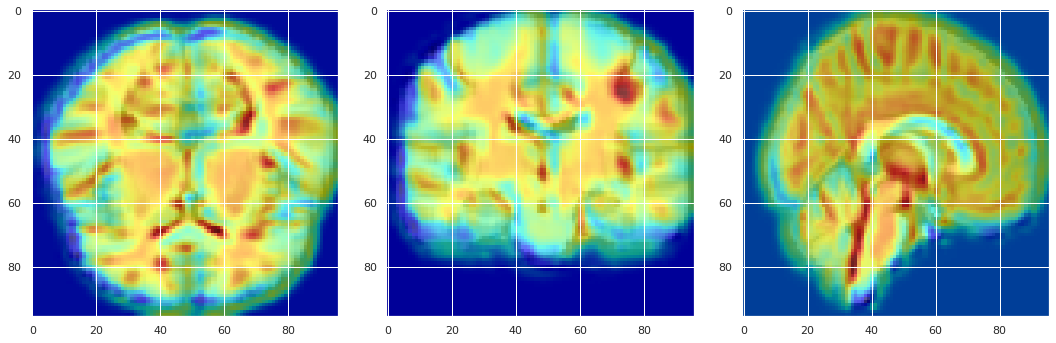

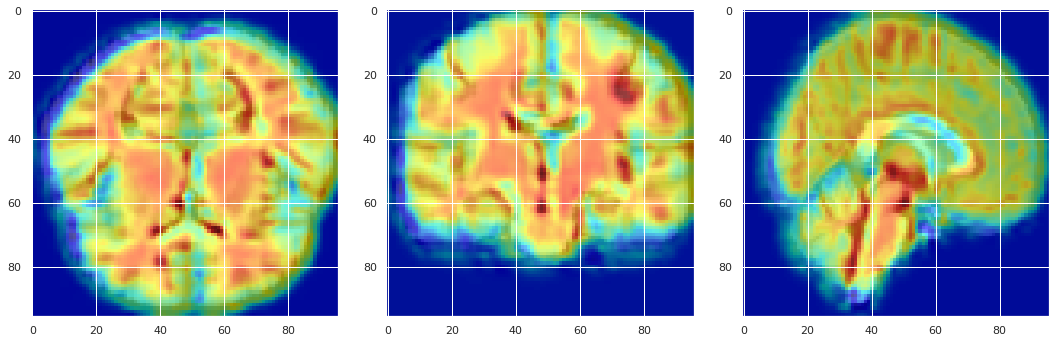

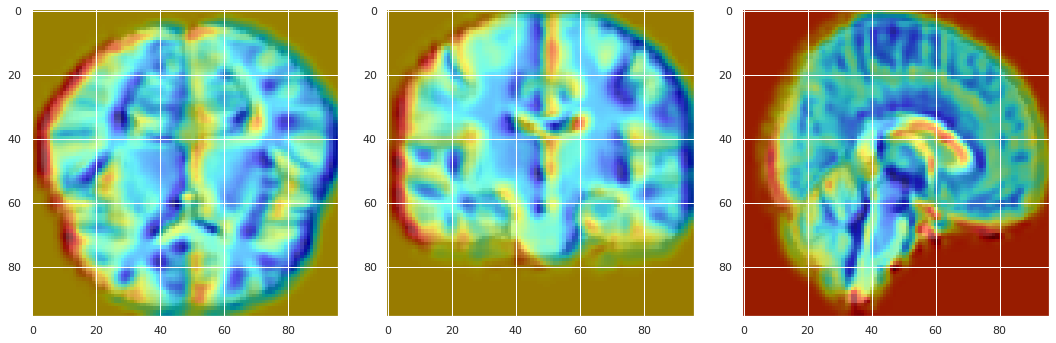

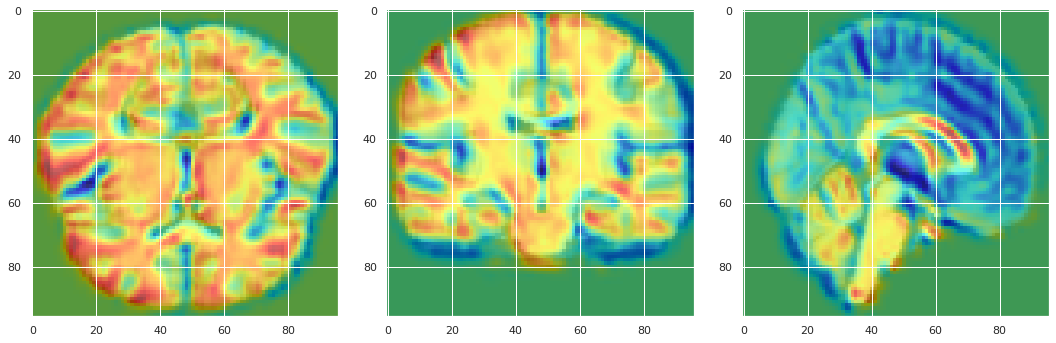

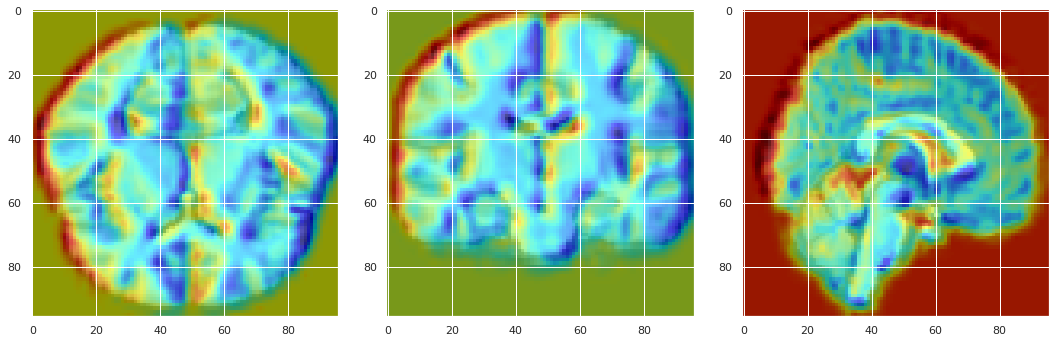

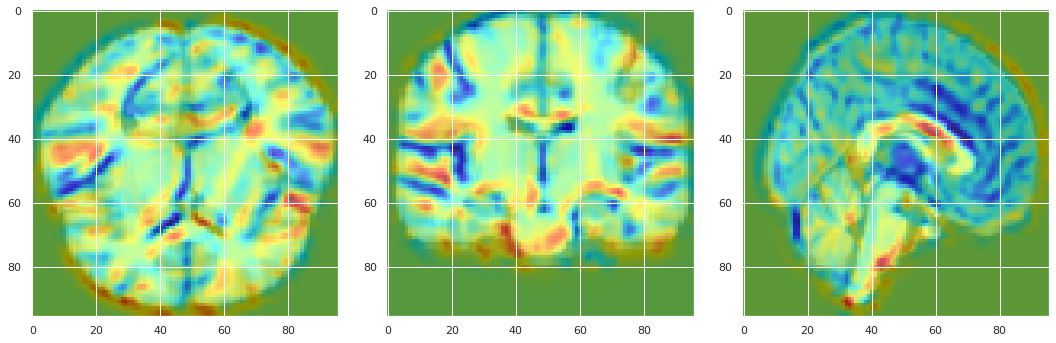

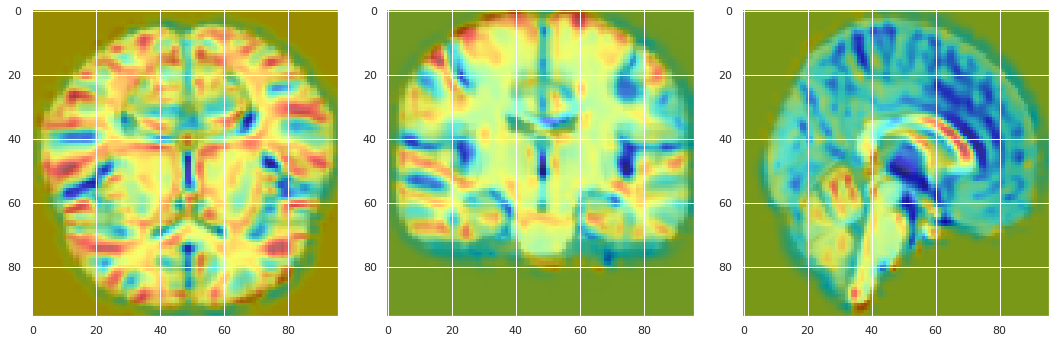

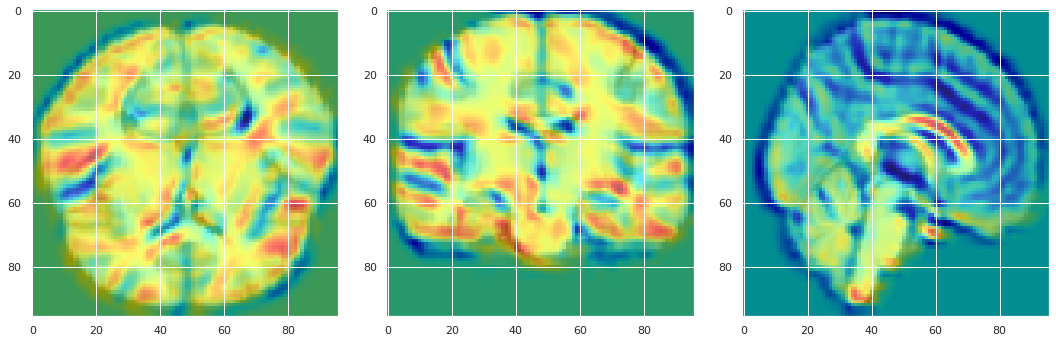

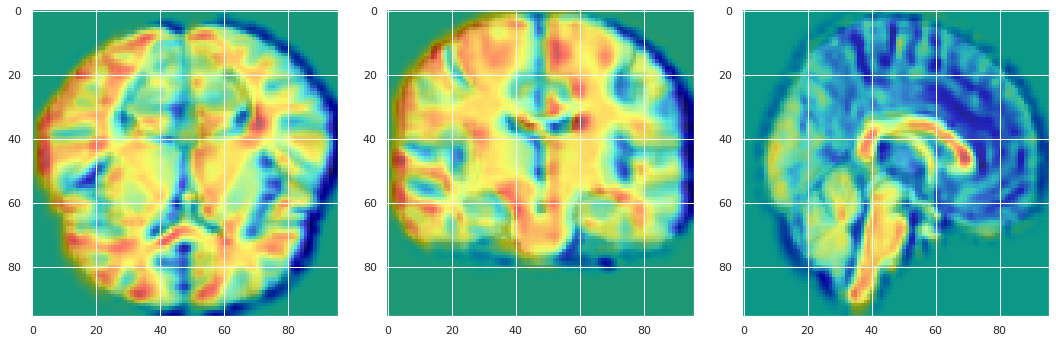

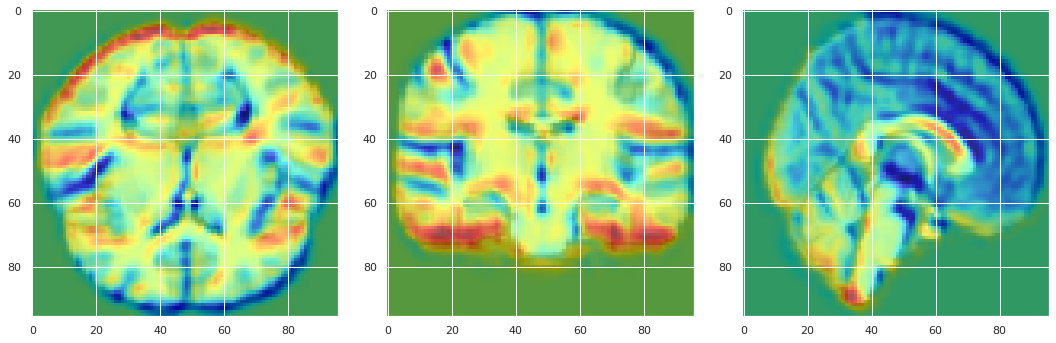

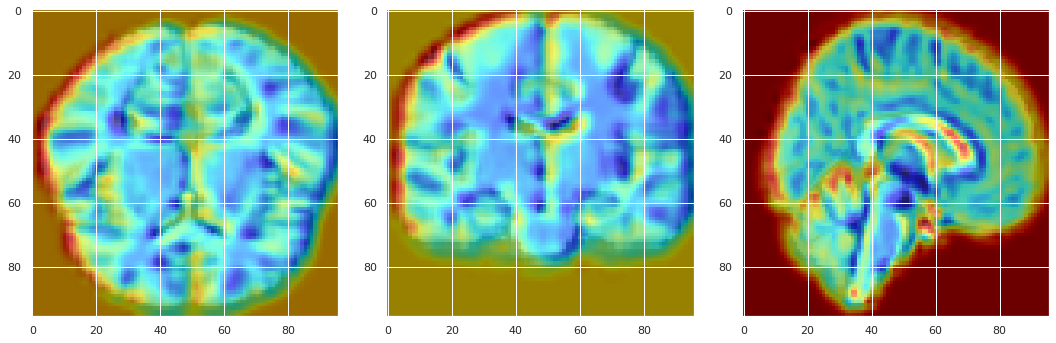

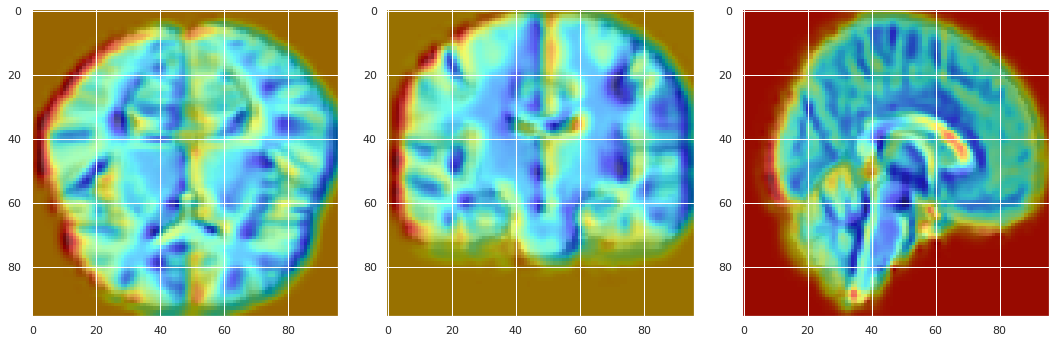

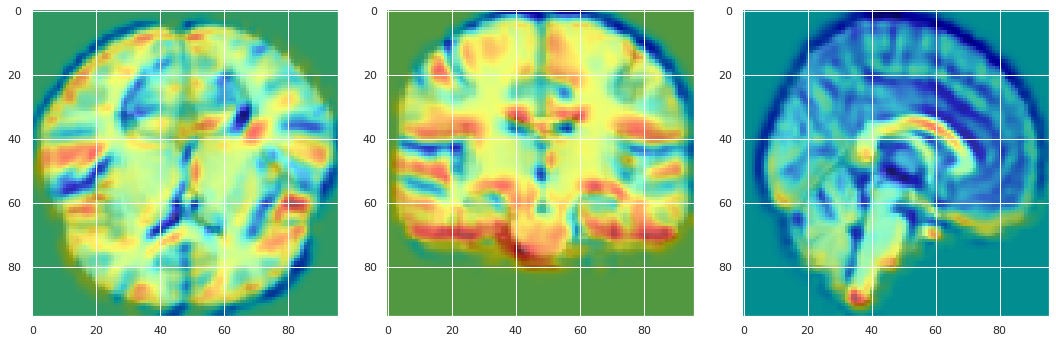

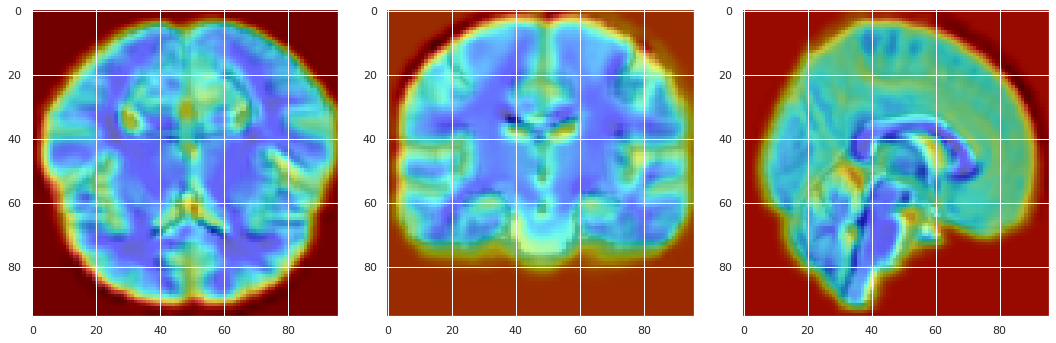

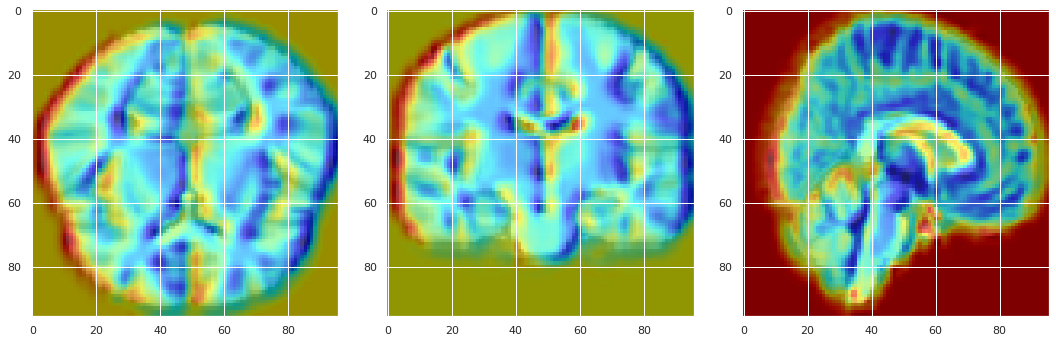

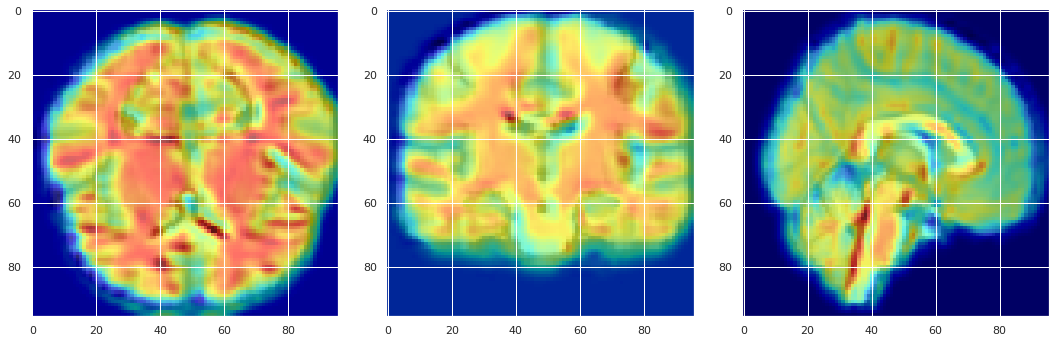

In [166]:
npy_root = sorted(glob("../resnet256_naive_checkpoints/*"))[23] + "/npy_std/layer0/*.npy"
npy_list = glob(npy_root)
for _npy_path in npy_list:
    plot_vismap(AVG, np.load(_npy_path), masked=False);

Augmentation Probability: {'affine': 0.5, 'elastic_deform': 0.0, 'flip': 0.5}
../augment_ablation/20220218-1338_resnet/npy_std/layer0/ep053_mae5.39.npy


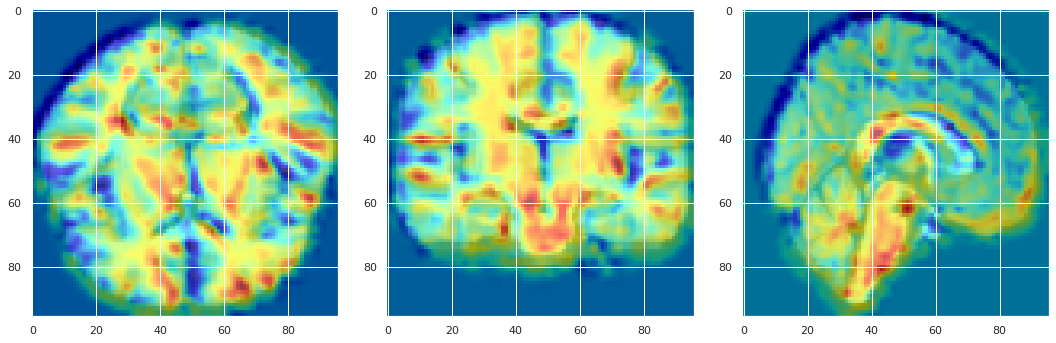

Augmentation Probability: {'affine': 0.0, 'elastic_deform': 0.5, 'flip': 0.5}
../augment_ablation/20220218-1359_resnet/npy_std/layer0/ep073_mae5.75.npy


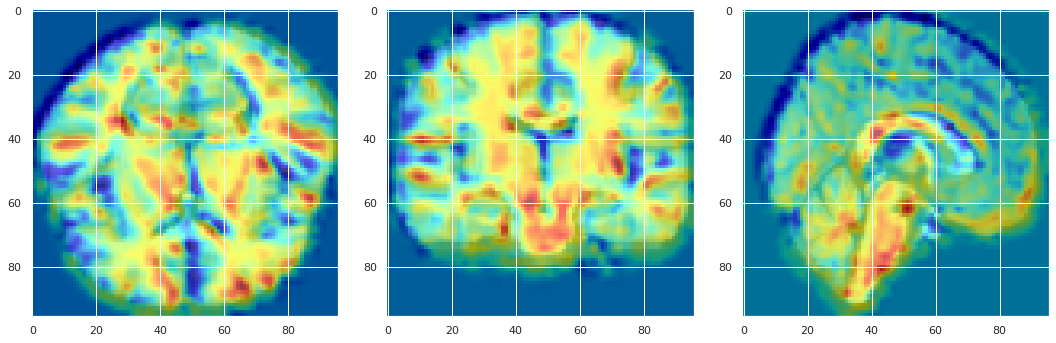

Augmentation Probability: {'affine': 0.5, 'elastic_deform': 0.0, 'flip': 0.0}
../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep040_mae6.46.npy


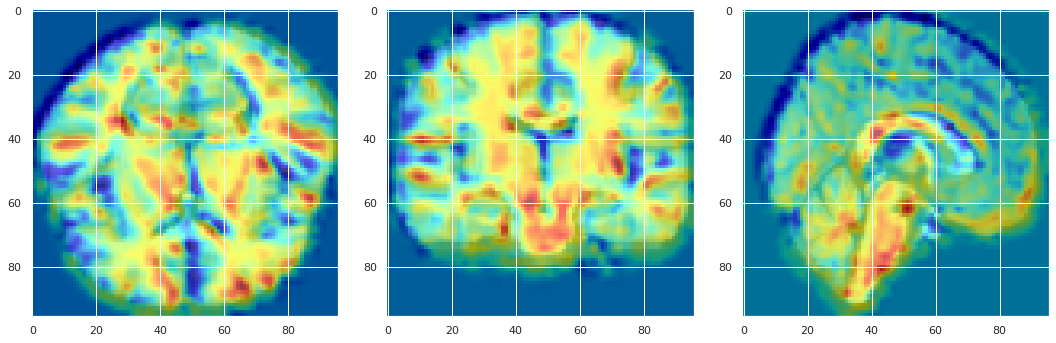

In [154]:
for idx, _dict in aug_min.items():

    print(f"Augmentation Probability: {_dict['aug_proba']}")
    print(f"{_dict['npy_path']}")
    plot_vismap(AVG, aug_min[0]["npy"], masked=False);

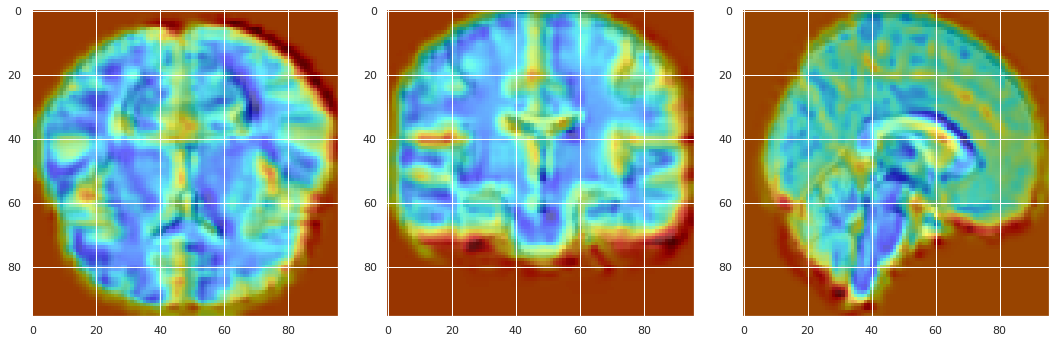

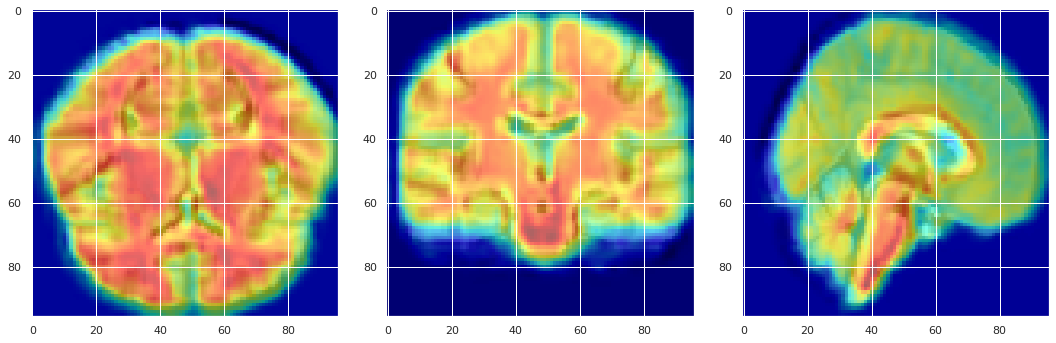

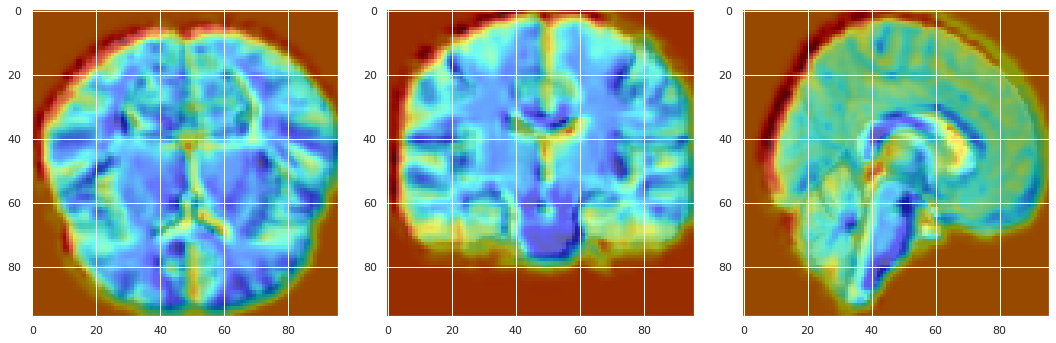

In [159]:
plot_vismap(AVG, (aug_min[0]["npy"] - aug_min[1]["npy"]), masked=False);
plot_vismap(AVG, (aug_min[1]["npy"] - aug_min[2]["npy"]), masked=False);
plot_vismap(AVG, (aug_min[2]["npy"] - aug_min[0]["npy"]), masked=False);

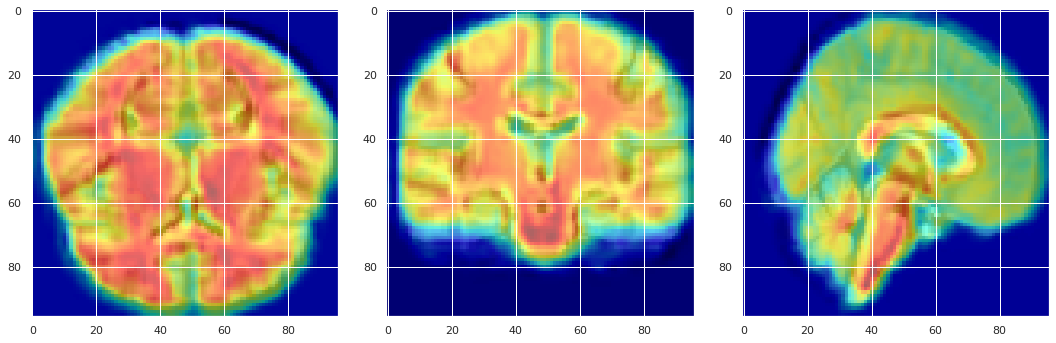

In [141]:
npy_list = glob(_result + "/npy_std/layer0/*.npy")
npy_list

['../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep033_mae5.08.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep001_mae43.29.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep015_mae11.93.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep050_mae5.63.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep020_mae5.5.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep030_mae6.22.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep005_mae7.3.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep006_mae6.75.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep029_mae5.14.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep028_mae5.29.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep025_mae6.5.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep000_mae55.32.npy',
 '../augment_ablation/20220218-1427_resnet/npy_std/layer0/ep053_

In [140]:
aug_min

{0: {'aug_proba': {'affine': 0.5, 'elastic_deform': 0.0, 'flip': 0.5},
  'min_mae': 5.831527161271604,
  'min_epoch': 53},
 1: {'aug_proba': {'affine': 0.0, 'elastic_deform': 0.5, 'flip': 0.5},
  'min_mae': 5.538791839390585,
  'min_epoch': 73},
 2: {'aug_proba': {'affine': 0.5, 'elastic_deform': 0.0, 'flip': 0.0},
  'min_mae': 5.780572264161829,
  'min_epoch': 40}}

In [138]:
min_mae

5.780572264161829

In [130]:
test_prediction = {k: MAE(gt_result, v) for k, v in test_prediction.items()}

In [132]:
min(test_prediction.values())

5.780572264161829